# SIDD Statistics

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from scipy.signal import savgol_filter
from scipy.interpolate import CubicSpline

from scipy.spatial.distance import jensenshannon

from utilities_tools.functions import string_to_np_array, return_arrays

In [2]:
file_sidd = 'data/sidd/sidd_ssim_psnr_stats.csv'
sidd_pd = pd.read_csv(file_sidd)
sidd_pd = sidd_pd.sort_values('Image')
sidd_pd = sidd_pd.reset_index(drop=True)

sidd_pd

Image  index     n     m      SSIM       PSNR  \
0    0001_001_S6_00100_00060_3200_L      1  5328  3000  0.657375  31.359814   
1    0001_001_S6_00100_00060_3200_L      0  5328  3000  0.657250  31.368597   
2    0002_001_S6_00100_00020_3200_N      0  5328  3000  0.733294  32.649529   
3    0002_001_S6_00100_00020_3200_N      1  5328  3000  0.733210  32.671070   
4    0003_001_S6_00100_00060_3200_H      1  5328  3000  0.798639  32.923180   
..                              ...    ...   ...   ...       ...        ...   
315  0198_010_GP_00100_00200_5500_N      0  4048  3044  0.869420  35.824257   
316  0199_010_GP_00800_01600_5500_N      0  4048  3044  0.556897  28.197748   
317  0199_010_GP_00800_01600_5500_N      1  4048  3044  0.557033  28.176107   
318  0200_010_GP_01600_03200_5500_N      0  4048  3044  0.396344  24.997236   
319  0200_010_GP_01600_03200_5500_N      1  4048  3044  0.396486  24.993420   

                                            SSIM_Crops  \
0    [[0.6075951457023621, 0.6136175990104675, 0.63...   
1    [[0.5968669056892395, 0.624210000038147, 0.644...   
2    [[0.7048224210739136, 0.7276548147201538, 0.73...   
3    [[0.6949631571769714, 0.7355318069458008, 0.73...   
4    [[0.8016988635063171, 0.8016712069511414, 0.80...   
..                                                 ...   
315  [[0.7284042239189148, 0.753731906414032, 0.767...   
316  [[0.4460659921169281, 0.46093592047691345, 0.4...   
317  [[0.410653680562973, 0.4597827196121216, 0.470...   
318  [[0.32164210081100464, 0.34374627470970154, 0....   
319  [[0.3370644450187683, 0.3387288749217987, 0.34...   

                                            PSNR_Crops  
0    [[27.073362350463867, 27.255277633666992, 27.4...  
1    [[27.369712829589844, 28.199260711669922, 28.7...  
2    [[25.700359344482422, 31.216440200805664, 31.5...  
3    [[25.972095489501953, 31.37872886657715, 31.72...  
4    [[31.61935806274414, 32.044578552246094, 32.21...  
..                                                 ...  
315  [[30.474533081054688, 32.049110412597656, 32.4...  
316  [[25.810714721679688, 26.15058135986328, 26.03...  
317  [[24.521663665771484, 26.08510971069336, 26.22...  
318  [[23.034944534301758, 23.567848205566406, 23.4...  
319  [[23.48689842224121, 23.46307373046875, 23.551...  

[320 rows x 8 columns]

In [3]:
ssim_array = []
psnr_array = []

for i in range(sidd_pd.shape[0]):
    ssim_array.append(string_to_np_array(sidd_pd['SSIM_Crops'][i]))
    psnr_array.append(string_to_np_array(sidd_pd['PSNR_Crops'][i]))

In [4]:
index = 136

image = sidd_pd.iloc[[index]]['Image']
index_image = sidd_pd.iloc[[index]]['index']

print(image, index_image)

136    0088_004_IP_00100_00050_5500_N
Name: Image, dtype: object 136    0
Name: index, dtype: int64


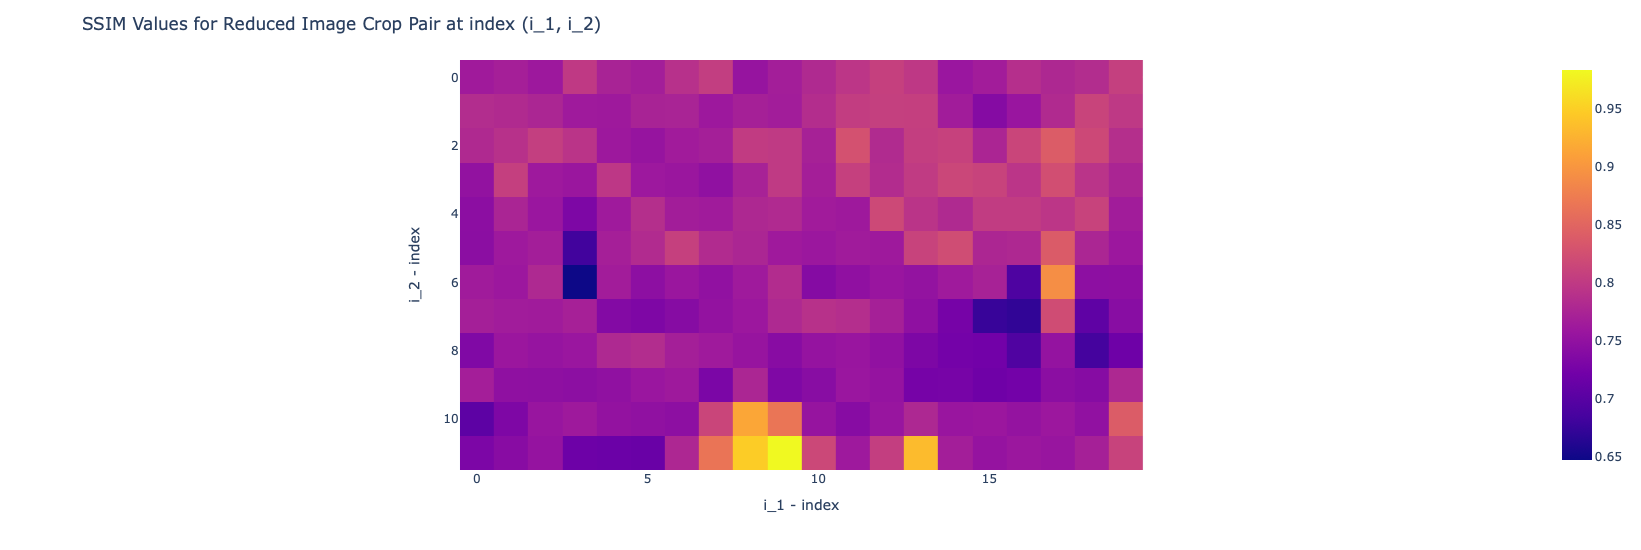

In [5]:
fig = px.imshow(ssim_array[index][5 - 1:17 - 1, 20 - 1:40 - 1])
fig.update_layout(title='SSIM Values for Reduced Image Crop Pair at index (i_1, i_2)'.format(i=0),
                  xaxis_title="i_1 - index",
                  yaxis_title="i_2 - index",
                  width=1900 / 2, height=1100 / 2
)
fig.show()

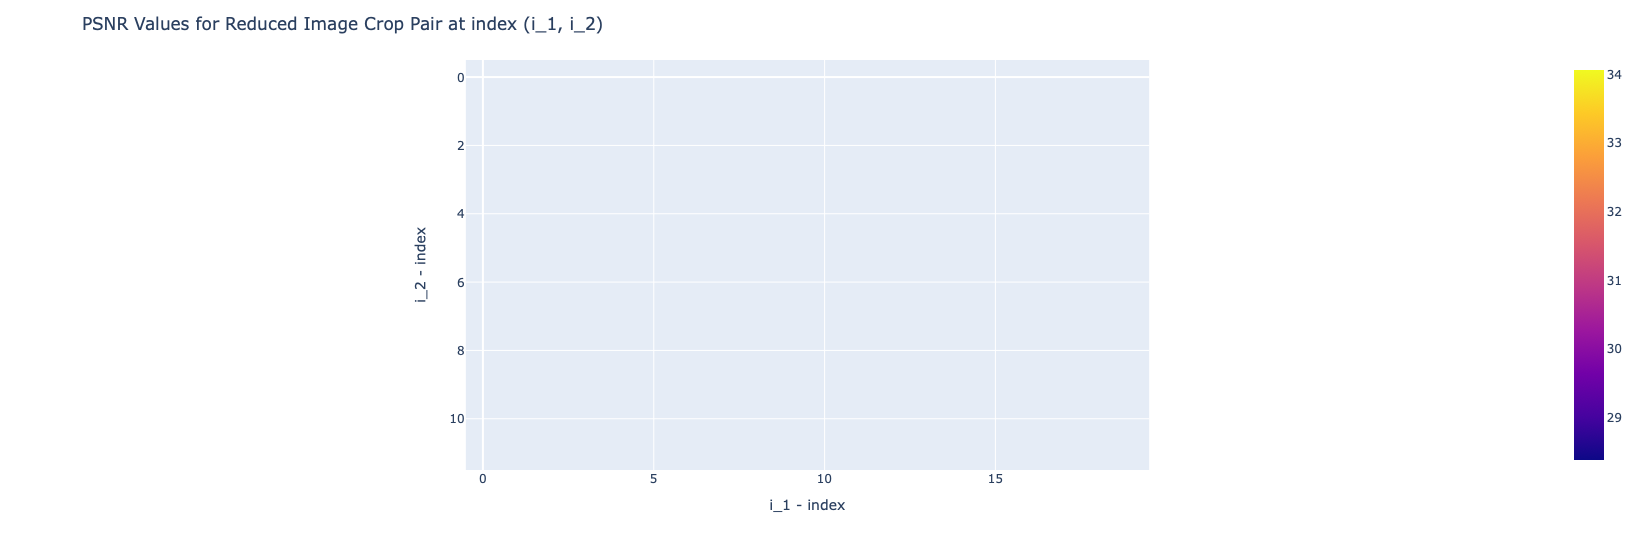

In [6]:
fig = px.imshow(psnr_array[index][5 - 1:17 - 1, 20 - 1:40 - 1])
fig.update_layout(title='PSNR Values for Reduced Image Crop Pair at index (i_1, i_2)'.format(i=0),
                  xaxis_title="i_1 - index",
                  yaxis_title="i_2 - index",
                  width=1900 / 2, height=1100 / 2
)
fig.show()

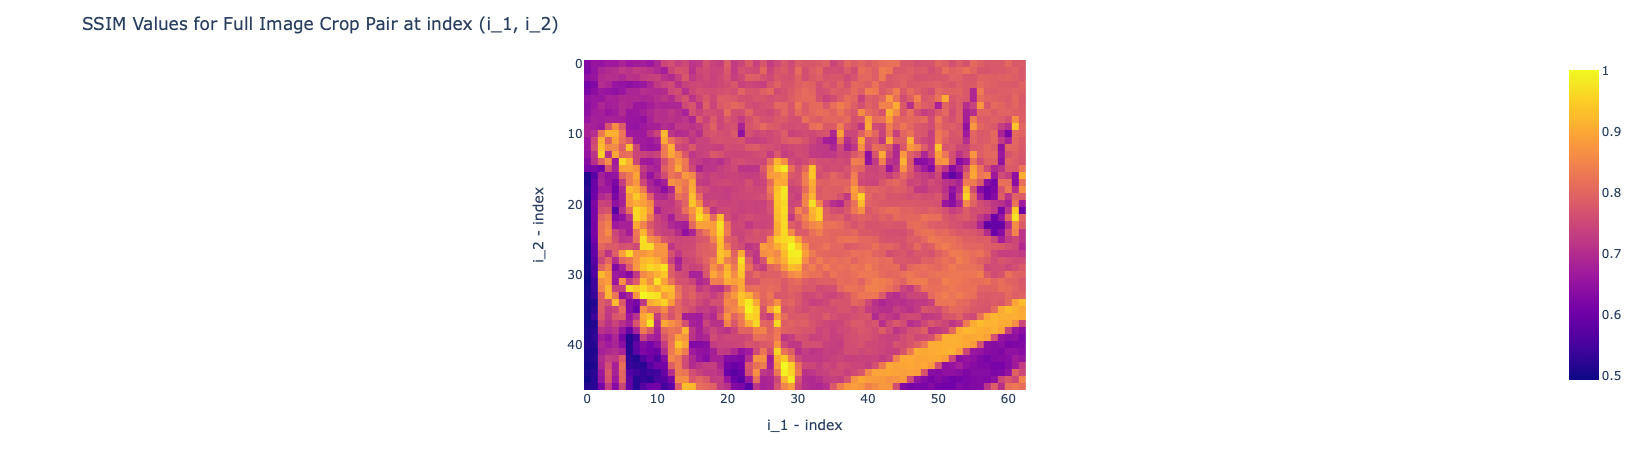

In [7]:
fig = px.imshow(ssim_array[index])
fig.update_layout(title='SSIM Values for Full Image Crop Pair at index (i_1, i_2)'.format(i=0),
                  xaxis_title="i_1 - index",
                  yaxis_title="i_2 - index",
                  width=630, height=470
)
fig.show()

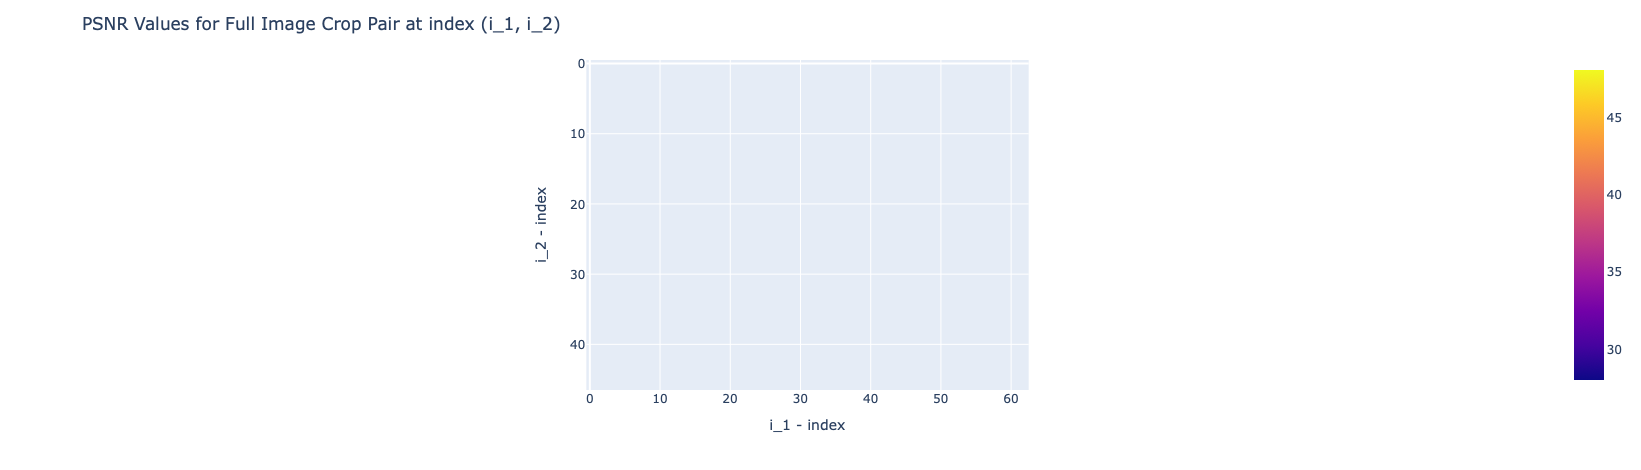

In [8]:
fig = px.imshow(psnr_array[index])
fig.update_layout(title='PSNR Values for Full Image Crop Pair at index (i_1, i_2)'.format(i=0),
                  xaxis_title="i_1 - index",
                  yaxis_title="i_2 - index",
                  width=630, height=470
)
fig.show()

## SSIM statistics

In [9]:
psnr_array[index] = np.array([[j if j < 60 else 60 for j in i] for i in psnr_array[index]])

In [10]:
print('SSIM Mean: ', ssim_array[index].mean(), '\nSSIM STD: ', ssim_array[index].std(), 
      '\nSSIM Max: ', ssim_array[index].max(), '\nSSIM Min: ', ssim_array[index].min(), 
      '\nSSIM Range: ', ssim_array[index].max() - ssim_array[index].min())

SSIM Mean:  0.7658368086682023 
SSIM STD:  0.08439230305445375 
SSIM Max:  1.0 
SSIM Min:  0.4929655194282532 
SSIM Range:  0.5070344805717468


In [11]:
print('PSNR Mean: ', psnr_array[index].mean(), '\nPSNR STD: ', psnr_array[index].std(), 
      '\nPSNR Max: ', psnr_array[index].max(), '\nPSNR Min: ', psnr_array[index].min(), 
      '\nPSNR Range: ', psnr_array[index].max() - psnr_array[index].min())

PSNR Mean:  31.98272787852289 
PSNR STD:  1.4623642503534502 
PSNR Max:  60.0 
PSNR Min:  27.98653793334961 
PSNR Range:  32.01346206665039


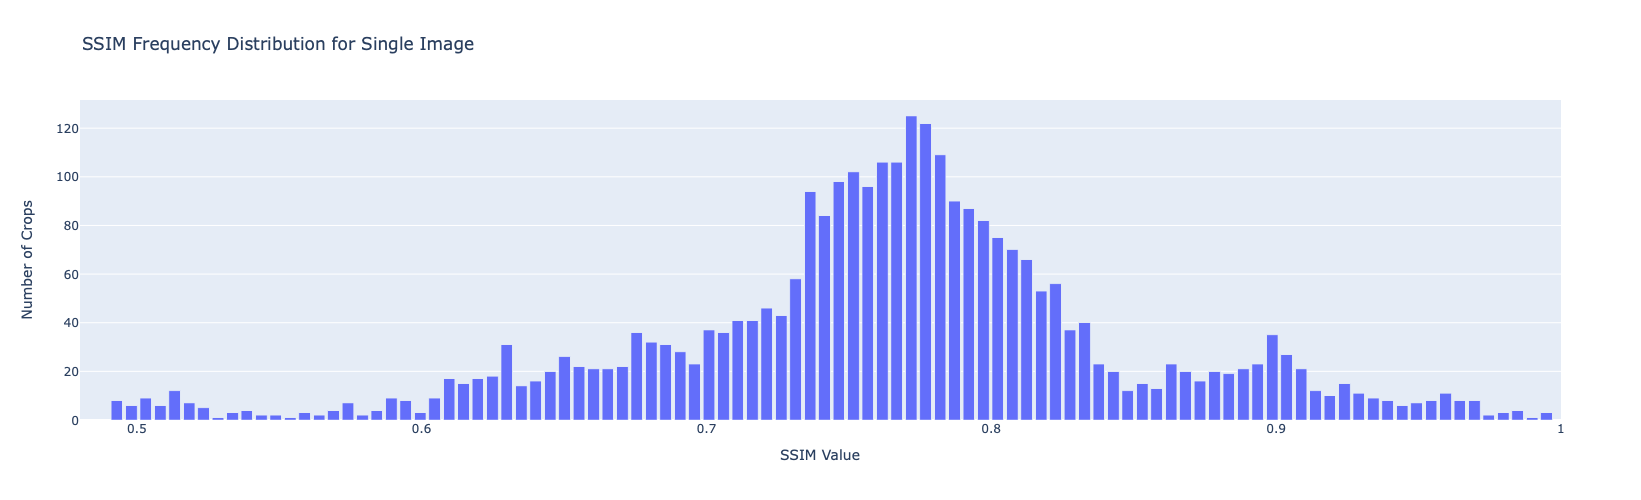

In [12]:
ssim_histogram_index = np.histogram(ssim_array[index], int(1e2))

fig = go.Figure(go.Bar(y=ssim_histogram_index[0], x=ssim_histogram_index[1], name='Histogram'))
fig.update_layout(title='SSIM Frequency Distribution for Single Image'.format(index=index),
                  xaxis_title="SSIM Value",
                  yaxis_title="Number of Crops",
                  width=800, height=500)
fig.update_xaxes(range = [0.48,1])
fig.show()

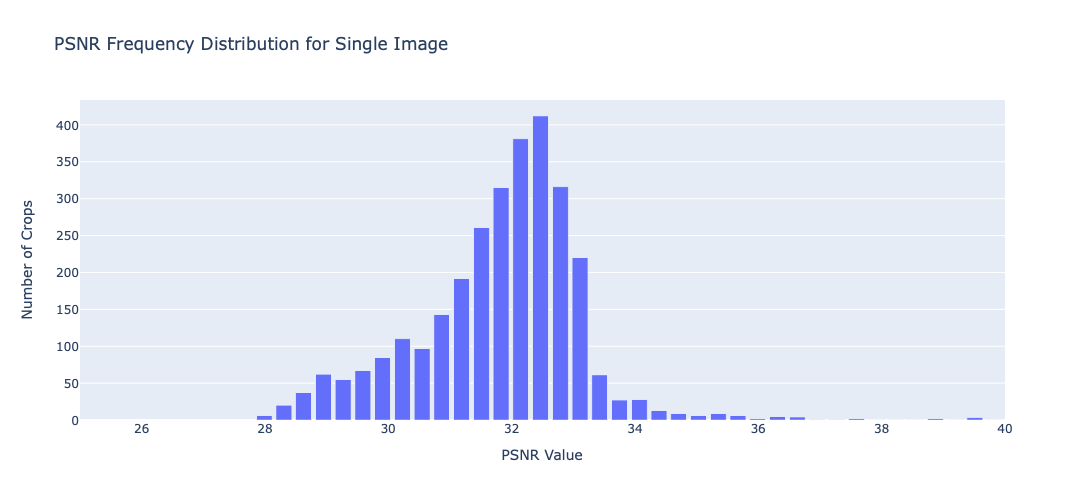

In [13]:
psnr_histogram_index = np.histogram(psnr_array[index], int(1e2))

fig = go.Figure(go.Bar(y=psnr_histogram_index[0], x=psnr_histogram_index[1], name='Histogram'))
fig.update_layout(title='PSNR Frequency Distribution for Single Image'.format(index=index),
                  xaxis_title="PSNR Value",
                  yaxis_title="Number of Crops",
                  width=800, height=500)
fig.update_xaxes(range = [25,40])
fig.show()

In [14]:
val = 0
for i in ssim_array:
    if i.size > val:
        val = i.size

print(val)

3818


In [15]:
ssim = np.concatenate([ssim.flatten() for ssim in ssim_array])
psnr = np.concatenate([psnr.flatten() for psnr in psnr_array])
psnr = np.array([i if i < 60 else 60 for i in psnr])

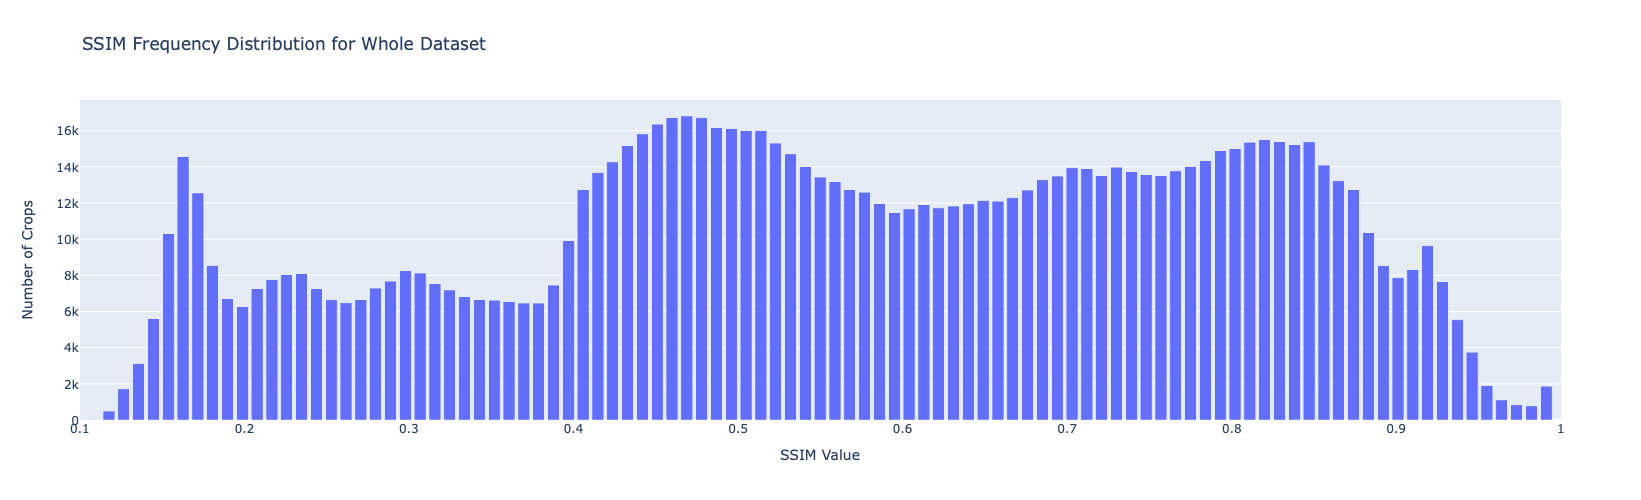

In [16]:
ssim_histogram_whole = np.histogram(ssim, int(1e2))

fig = go.Figure(go.Bar(y=ssim_histogram_whole[0], x=ssim_histogram_whole[1], name='Histogram'))
fig.update_layout(title='SSIM Frequency Distribution for Whole Dataset'.format(index=index),
                  xaxis_title="SSIM Value",
                  yaxis_title="Number of Crops",
                  width=800, height=500)
fig.update_xaxes(range = [0.1,1])
fig.show()

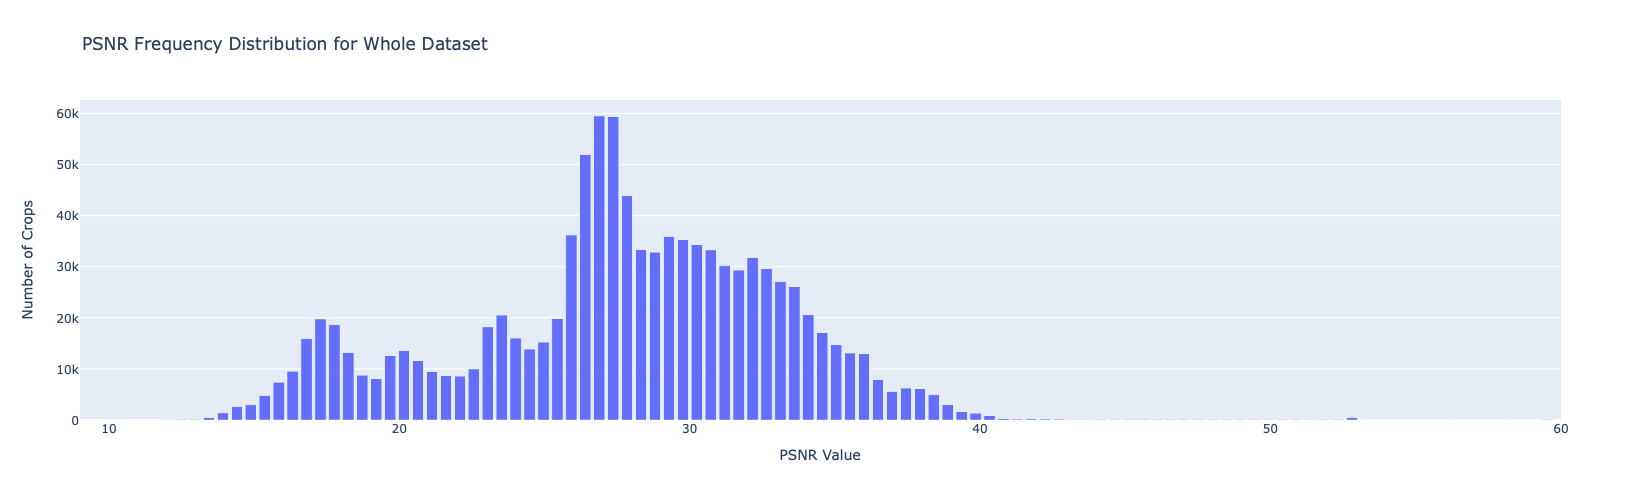

In [17]:
psnr_histogram_whole = np.histogram(psnr, int(1e2))

fig = go.Figure(go.Bar(y=psnr_histogram_whole[0], x=psnr_histogram_whole[1], name='Histogram'))
fig.update_layout(title='PSNR Frequency Distribution for Whole Dataset'.format(index=index),
                  xaxis_title="PSNR Value",
                  yaxis_title="Number of Crops",
                  width=800, height=500)
fig.update_xaxes(range = [9,60])
fig.show()

In [18]:
def probability_values(array, samples=int(1e2), window=25, pol=7, max_val=1):
    array_histogram = np.histogram(array, bins=samples, range=(0, max_val))

    probability_array = array_histogram[0] / sum(array_histogram[0])
    probability_array_smooth = [max(0, i) for i in savgol_filter(probability_array, window, pol)]
    probability_array_smooth = np.array(probability_array_smooth / sum(probability_array_smooth))
    values_array = np.array((array_histogram[1][:-1] + array_histogram[1][1:]) / 2)
    
    f_array = CubicSpline(values_array, probability_array_smooth)
    x_array = np.arange(min(values_array), max(values_array), 1e-3)
    f_x_array = f_array(x_array)
    
    return probability_array, probability_array_smooth, values_array, f_array, x_array, f_x_array


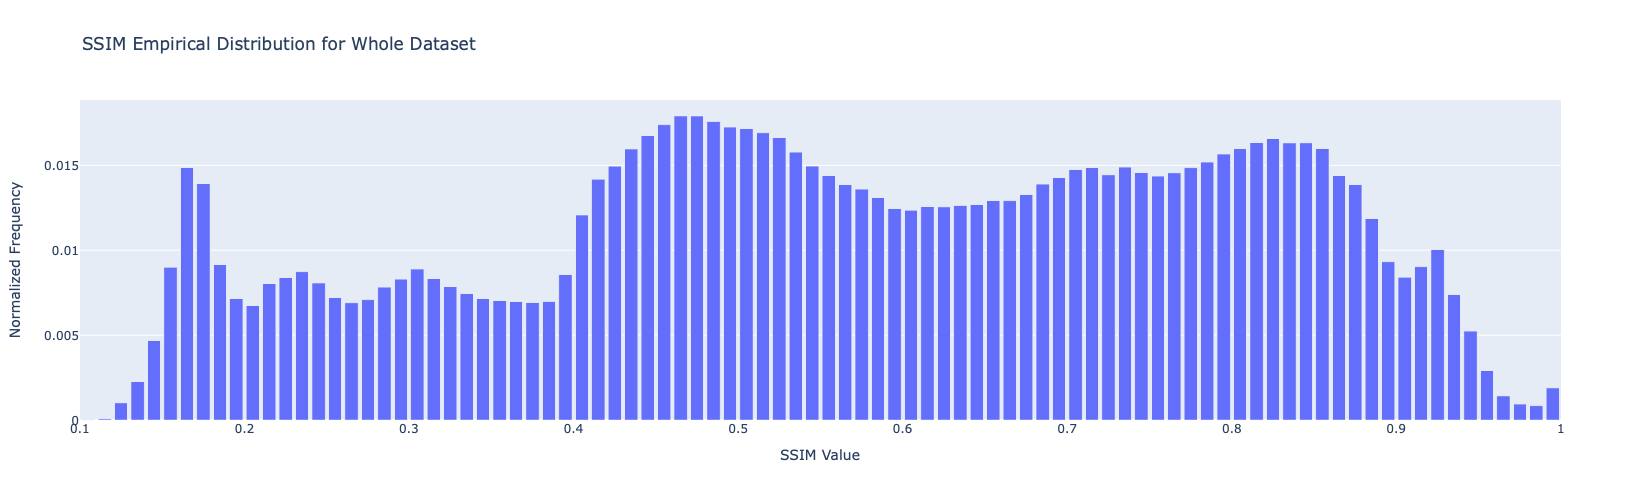

In [19]:
prob_ssim, prob_ssim_smooth, values_ssim, f_ssim, x_ssim, f_x_ssim = probability_values(ssim)

fig = go.Figure(go.Bar(y=prob_ssim, x=values_ssim, name='Histogram'))
# fig.add_trace(go.Scatter(x=x_ssim, y=f_x_ssim, name='cubic spline fit'))
fig.update_layout(title='SSIM Empirical Distribution for Whole Dataset',
                  xaxis_title="SSIM Value",
                  yaxis_title="Normalized Frequency",
                  width=800, height=500)
fig.update_xaxes(range = [0.1,1])
fig.show()

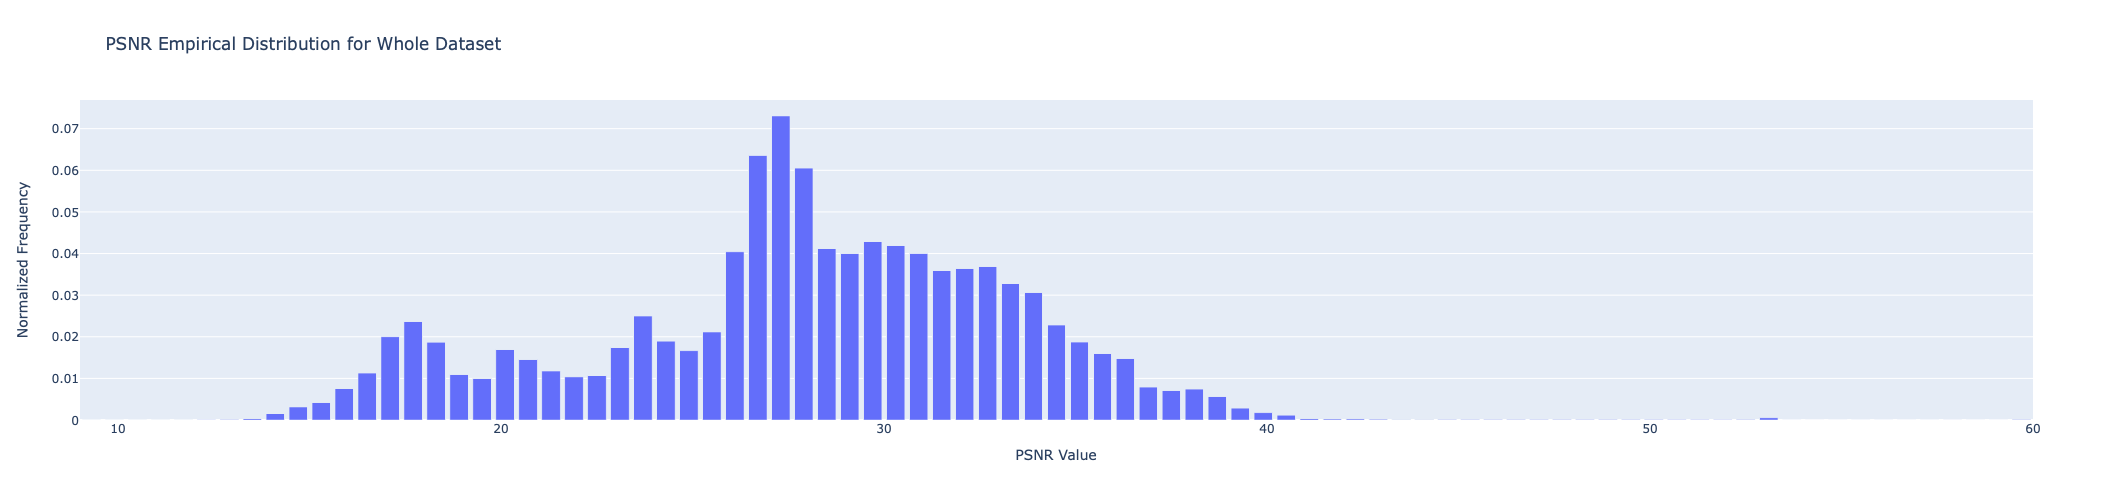

In [20]:
prob_psnr, prob_psnr_smooth, values_psnr, f_psnr, x_psnr, f_x_psnr = probability_values(psnr, 
                                                                                        max_val=60)

fig = go.Figure(go.Bar(y=prob_psnr, x=values_psnr, name='Histogram'))
# fig.add_trace(go.Scatter(x=x_psnr, y=f_x_psnr, name='cubic spline fit'))
fig.update_layout(title='PSNR Empirical Distribution for Whole Dataset',
                  xaxis_title="PSNR Value",
                  yaxis_title="Normalized Frequency",
                  width=800, height=500)
fig.update_xaxes(range = [9,60])
fig.show()

## Sampling n Crop per Image

## Sampling 1 Crop in Each Image

In [21]:
ssim_0001, psnr_0001 = return_arrays(ssim_array, psnr_array, 1)

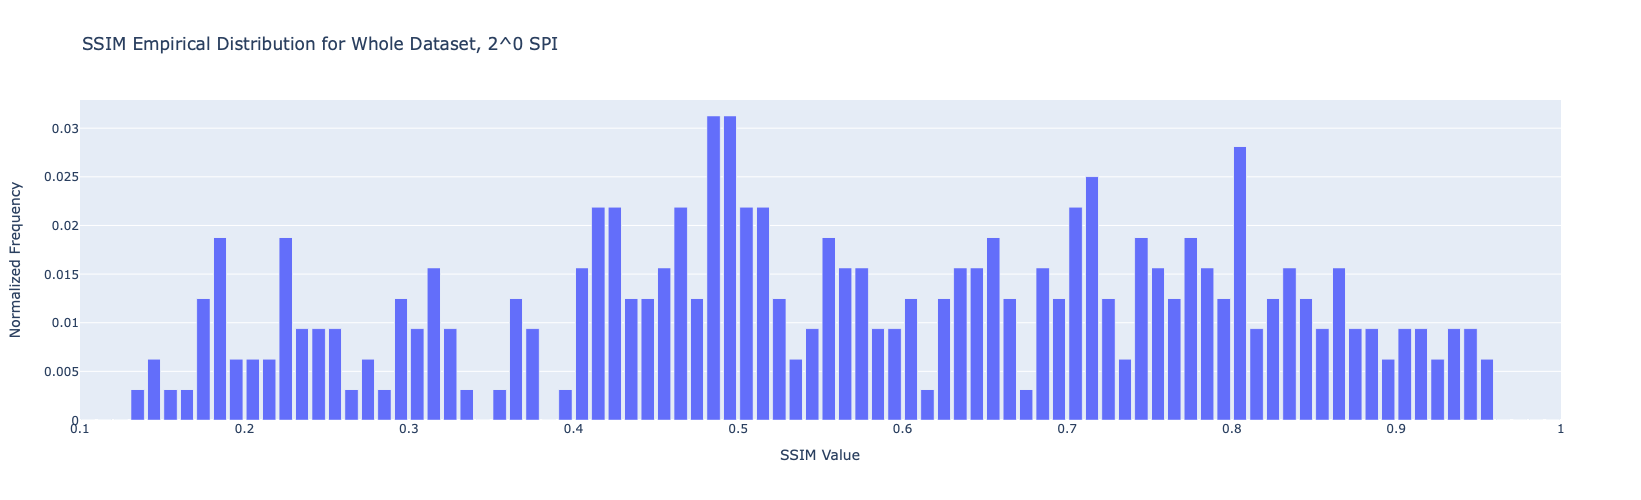

In [22]:
prob_ssim_0001, _, values_ssim_0001, _, x_ssim_0001, f_x_ssim_0001 = probability_values(ssim_0001)

fig = go.Figure(go.Bar(y=prob_ssim_0001, x=values_ssim_0001, name='2^0'))
# fig.add_trace(go.Bar(y=prob_ssim, x=values_ssim, name='Full'))
# fig.add_trace(go.Scatter(x=x_ssim, y=f_x_ssim, name='cubic spline fit'))
# fig.add_trace(go.Scatter(x=x_ssim_0001, y=f_x_ssim_0001, name='cubic spline fit 0001'))
fig.update_layout(title='SSIM Empirical Distribution for Whole Dataset, 2^0 SPI',
                  xaxis_title="SSIM Value",
                  yaxis_title="Normalized Frequency",
                  width=800, height=500)
fig.update_traces(opacity=1)
fig.update_xaxes(range = [0.1,1])
fig.show()

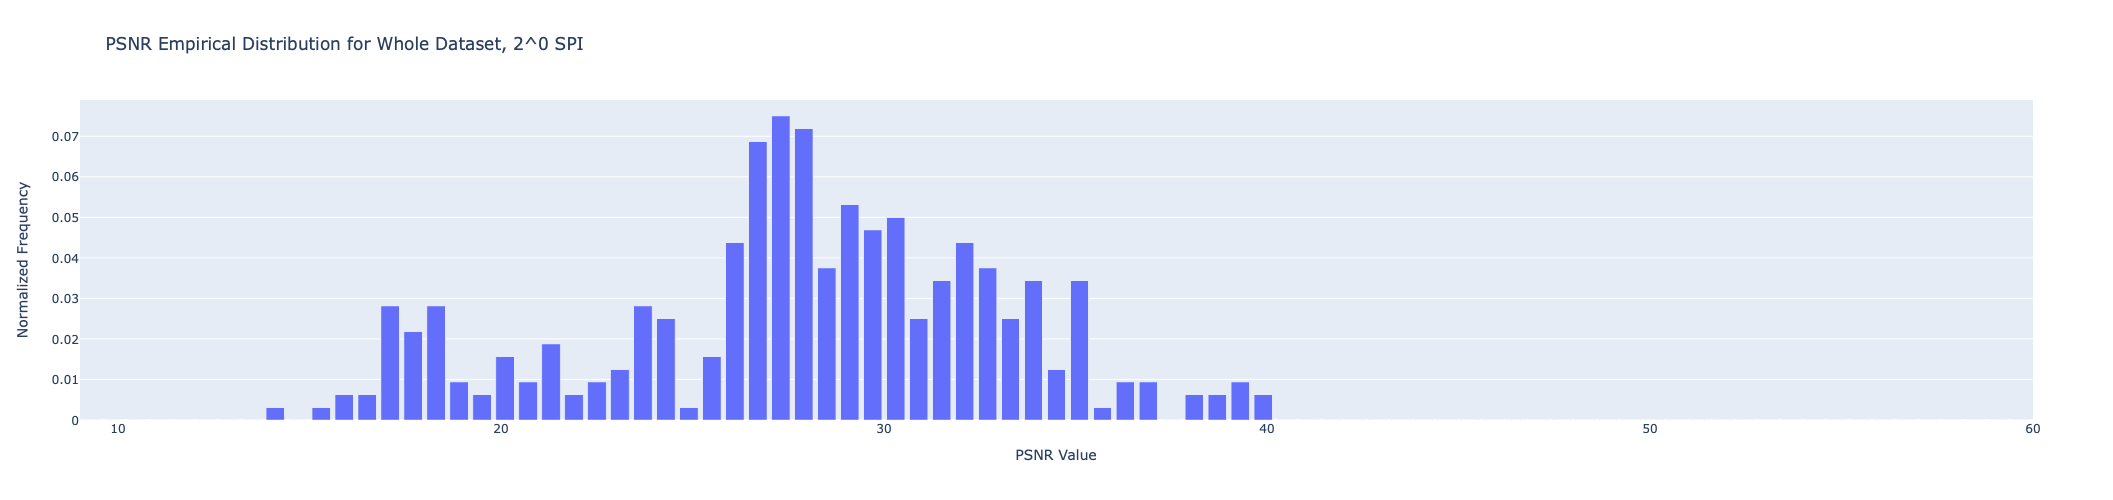

In [23]:
prob_psnr_0001, _, values_psnr_0001, _, x_psnr_0001, f_x_psnr_0001 = probability_values(psnr_0001, 
                                                                                        max_val=60)
fig = go.Figure(go.Bar(y=prob_psnr_0001, x=values_psnr_0001, name='2^0'))
# fig.add_trace(go.Bar(y=prob_psnr, x=values_psnr, name='Full'))
# fig.add_trace(go.Scatter(x=x_psnr, y=f_x_psnr, name='cubic spline fit'))
# fig.add_trace(go.Scatter(x=x_psnr_0001, y=f_x_psnr_0001, name='cubic spline fit 0001'))
fig.update_layout(title='PSNR Empirical Distribution for Whole Dataset, 2^0 SPI',
                  xaxis_title="PSNR Value",
                  yaxis_title="Normalized Frequency",
                  width=800, height=500)
fig.update_xaxes(range = [9,60])
fig.show()

### KL Divergence 0001

In [24]:
JS_ssim_0001 = jensenshannon(prob_ssim, prob_ssim_0001)
JS_psnr_0001 = jensenshannon(prob_psnr, prob_psnr_0001)

print(JS_ssim_0001, JS_psnr_0001)

0.17578293960925434 0.14062744753180811


## Sampling 2 Crop in Each Image

In [25]:
ssim_0002, psnr_0002 = return_arrays(ssim_array, psnr_array, 2)

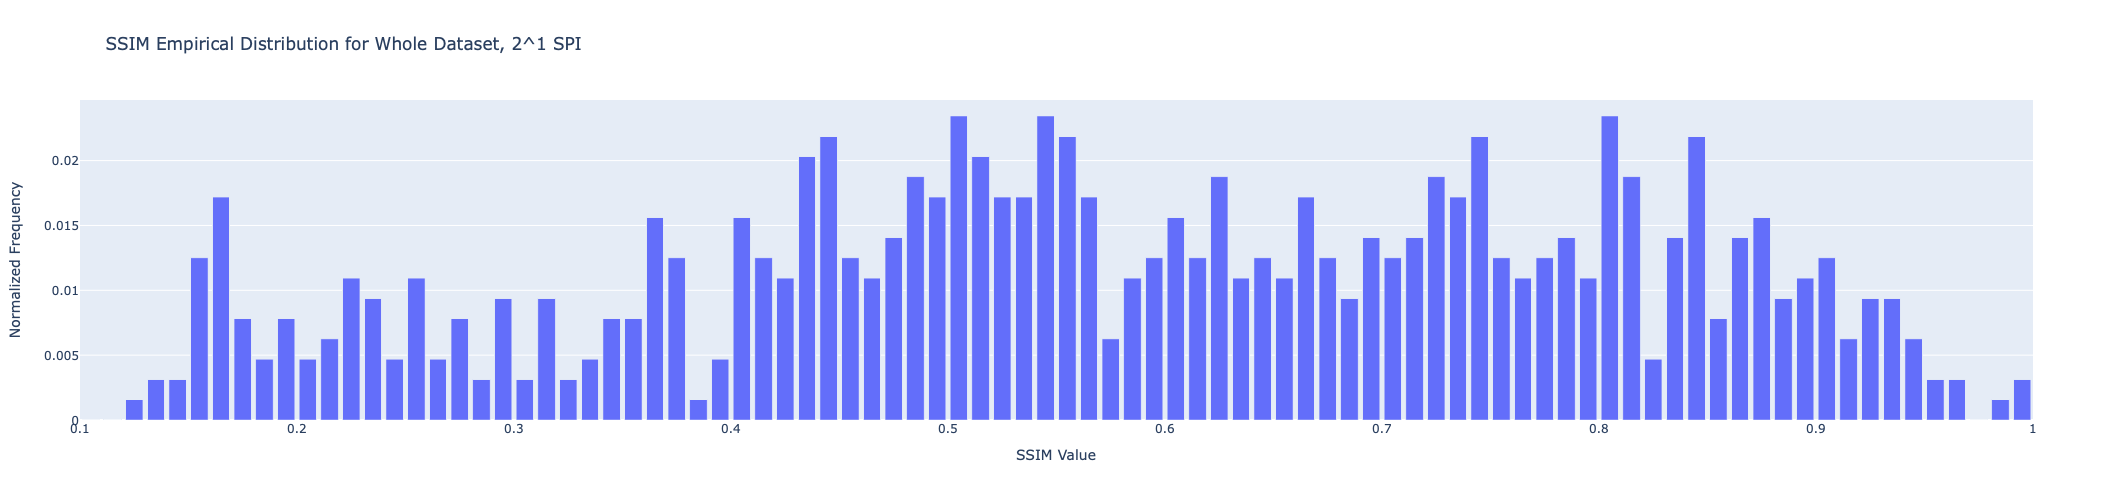

In [26]:
prob_ssim_0002, _, values_ssim_0002, _, x_ssim_0002, f_x_ssim_0002 = probability_values(ssim_0002)

fig = go.Figure(go.Bar(y=prob_ssim_0002, x=values_ssim_0002, name='2^1'))
# fig.add_trace(go.Bar(y=prob_ssim, x=values_ssim, name='Full'))
# fig.add_trace(go.Scatter(x=x_ssim, y=f_x_ssim, name='cubic spline fit'))
# fig.add_trace(go.Scatter(x=x_ssim_0002, y=f_x_ssim_0002, name='cubic spline fit 0002'))
fig.update_layout(title='SSIM Empirical Distribution for Whole Dataset, 2^1 SPI',
                  xaxis_title="SSIM Value",
                  yaxis_title="Normalized Frequency",
                  width=800, height=500)
fig.update_traces(opacity=1)
fig.update_xaxes(range = [0.1,1])
fig.show()

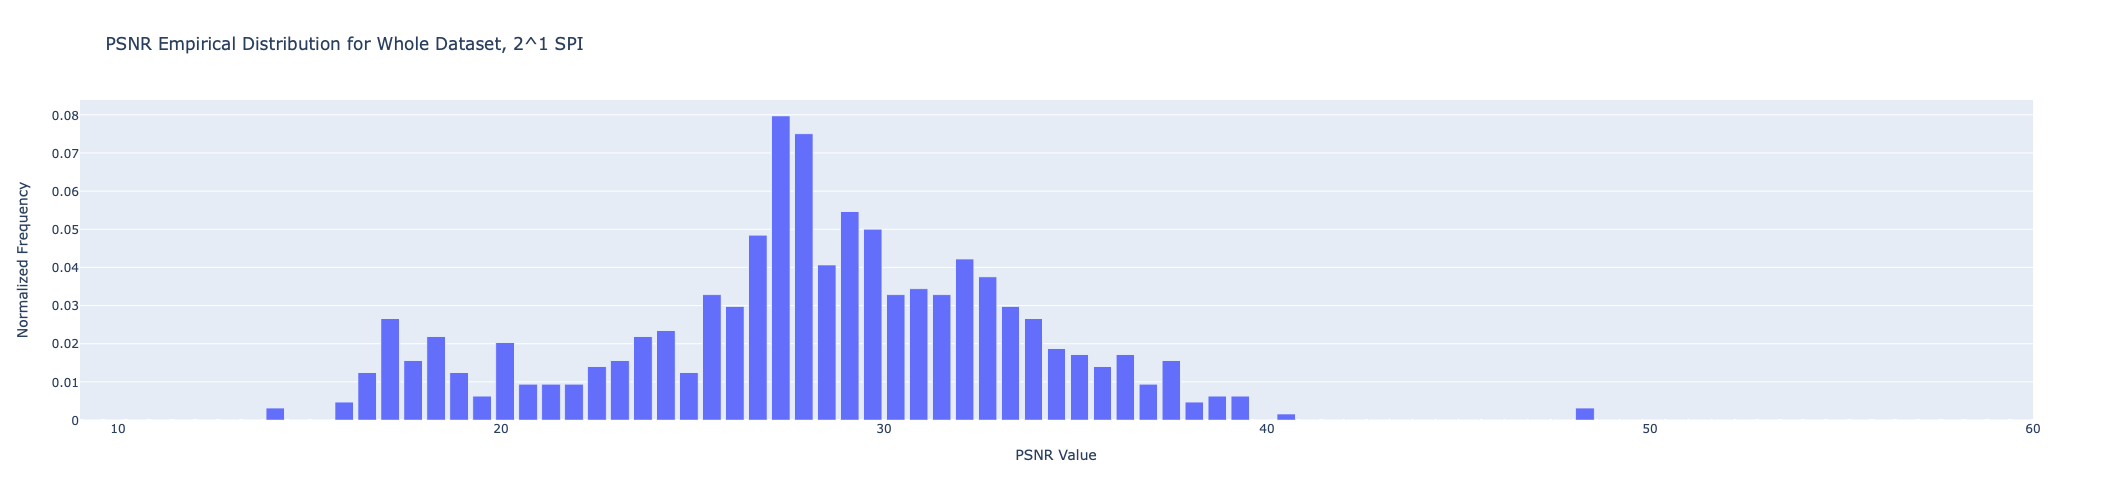

In [27]:
prob_psnr_0002, _, values_psnr_0002, _, x_psnr_0002, f_x_psnr_0002 = probability_values(psnr_0002, 
                                                                                        max_val=60)
fig = go.Figure(go.Bar(y=prob_psnr_0002, x=values_psnr_0002, name='2^1'))
# fig.add_trace(go.Bar(y=prob_psnr, x=values_psnr, name='Full'))
# fig.add_trace(go.Scatter(x=x_psnr, y=f_x_psnr, name='cubic spline fit'))
# fig.add_trace(go.Scatter(x=x_psnr_0002, y=f_x_psnr_0002, name='cubic spline fit 0002'))
fig.update_layout(title='PSNR Empirical Distribution for Whole Dataset, 2^1 SPI',
                  xaxis_title="PSNR Value",
                  yaxis_title="Normalized Frequency",
                  width=800, height=500)
fig.update_xaxes(range = [9,60])
fig.show()

### KL Divergence 0002

In [28]:
JS_ssim_0002 = jensenshannon(prob_ssim, prob_ssim_0002)
JS_psnr_0002 = jensenshannon(prob_psnr, prob_psnr_0002)

print(JS_ssim_0002, JS_psnr_0002)

0.1262924443045921 0.11130663859099162


## Sampling 4 Crop in Each Image

In [29]:
ssim_0004, psnr_0004 = return_arrays(ssim_array, psnr_array, 4)

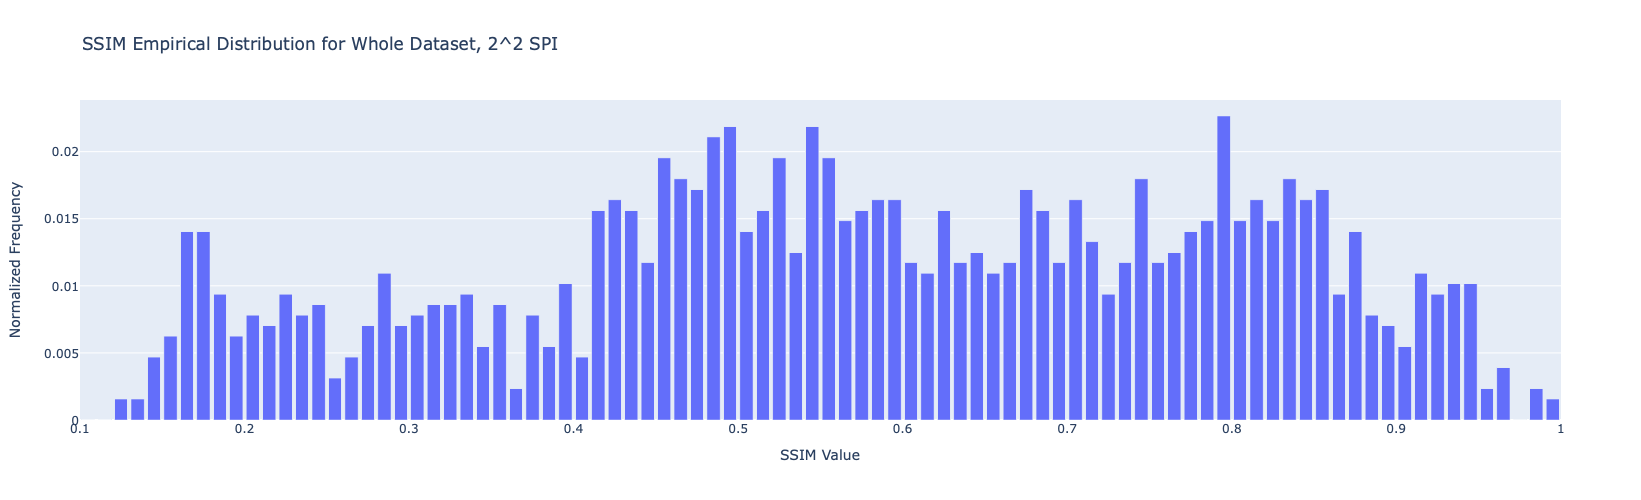

In [30]:
prob_ssim_0004, _, values_ssim_0004, _, x_ssim_0004, f_x_ssim_0004 = probability_values(ssim_0004)

fig = go.Figure(go.Bar(y=prob_ssim_0004, x=values_ssim_0004, name='2^2'))
# fig.add_trace(go.Bar(y=prob_ssim, x=values_ssim, name='Full'))
# fig.add_trace(go.Scatter(x=x_ssim, y=f_x_ssim, name='cubic spline fit'))
# fig.add_trace(go.Scatter(x=x_ssim_0004, y=f_x_ssim_0004, name='cubic spline fit 0004'))
fig.update_layout(title='SSIM Empirical Distribution for Whole Dataset, 2^2 SPI',
                  xaxis_title="SSIM Value",
                  yaxis_title="Normalized Frequency",
                  width=800, height=500)
fig.update_xaxes(range = [0.1,1])
fig.show()

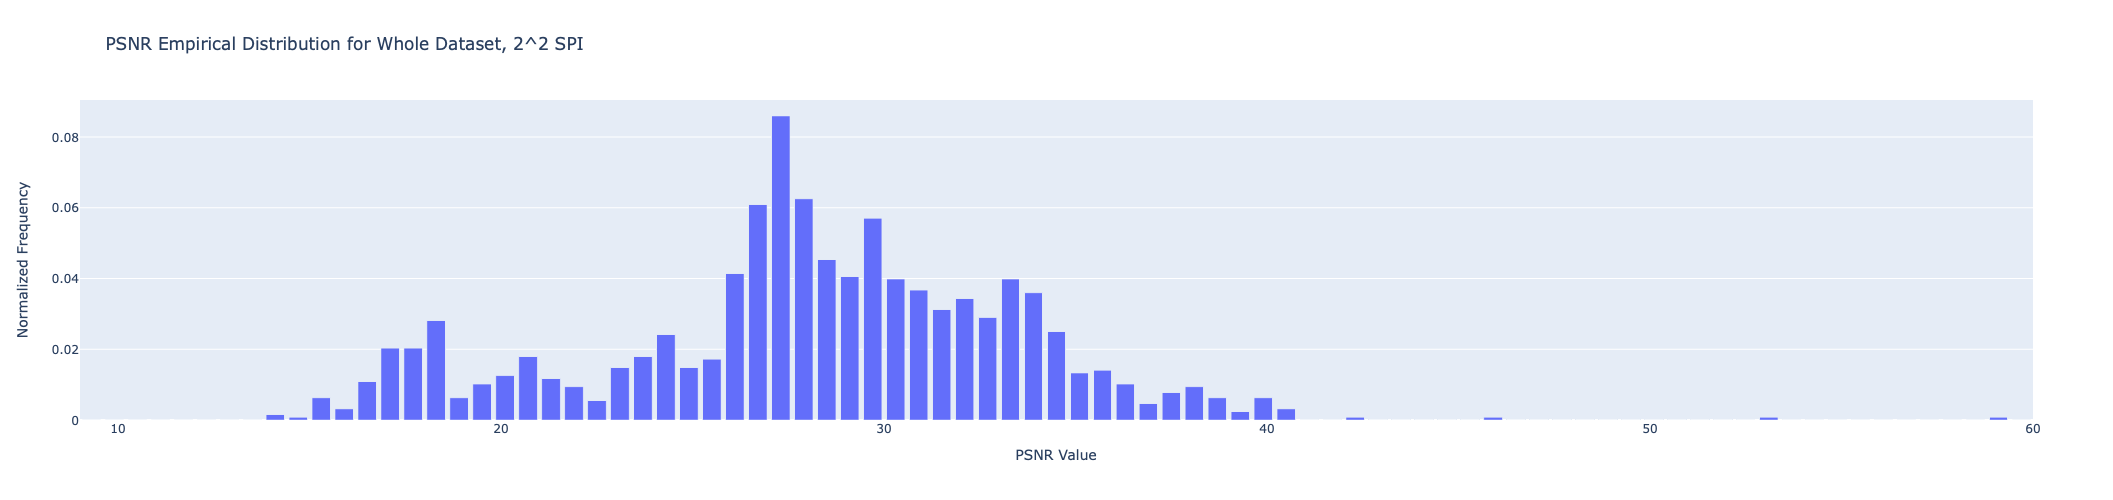

In [31]:
prob_psnr_0004, _, values_psnr_0004, _, x_psnr_0004, f_x_psnr_0004 = probability_values(psnr_0004, 
                                                                                        max_val=60)
fig = go.Figure(go.Bar(y=prob_psnr_0004, x=values_psnr_0004, name='2^2'))
# fig.add_trace(go.Bar(y=prob_psnr, x=values_psnr, name='Full'))
# fig.add_trace(go.Scatter(x=x_psnr, y=f_x_psnr, name='cubic spline fit'))
# fig.add_trace(go.Scatter(x=x_psnr_0004, y=f_x_psnr_0004, name='cubic spline fit 0004'))
fig.update_layout(title='PSNR Empirical Distribution for Whole Dataset, 2^2 SPI',
                  xaxis_title="PSNR Value",
                  yaxis_title="Normalized Frequency",
                  width=800, height=500)
fig.update_xaxes(range = [9,60])
fig.show()

## KL Divergence 0004

In [32]:
JS_ssim_0004 = jensenshannon(prob_ssim, prob_ssim_0004)
JS_psnr_0004 = jensenshannon(prob_psnr, prob_psnr_0004)

print(JS_ssim_0004, JS_psnr_0004)

0.08804520882095736 0.08845925157140616


## Sampling 8 Crop in Each Image

In [33]:
ssim_0008, psnr_0008 = return_arrays(ssim_array, psnr_array, 8)

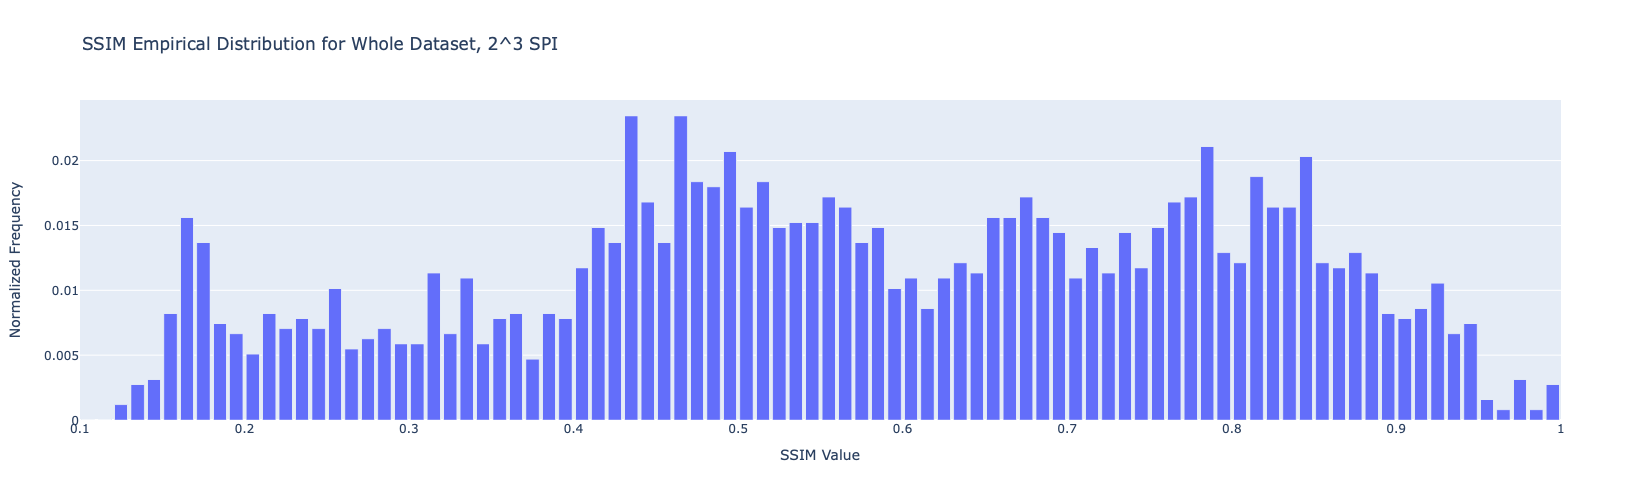

In [34]:
prob_ssim_0008, _, values_ssim_0008, _, x_ssim_0008, f_x_ssim_0008 = probability_values(ssim_0008)

fig = go.Figure(go.Bar(y=prob_ssim_0008, x=values_ssim_0008, name='2^3'))
# fig.add_trace(go.Bar(y=prob_ssim, x=values_ssim, name='Full'))
# fig.add_trace(go.Scatter(x=x_ssim, y=f_x_ssim, name='cubic spline fit'))
# fig.add_trace(go.Scatter(x=x_ssim_0008, y=f_x_ssim_0008, name='cubic spline fit 0008'))
fig.update_layout(title='SSIM Empirical Distribution for Whole Dataset, 2^3 SPI',
                  xaxis_title="SSIM Value",
                  yaxis_title="Normalized Frequency",
                  width=800, height=500)
fig.update_xaxes(range = [0.1,1])
fig.show()

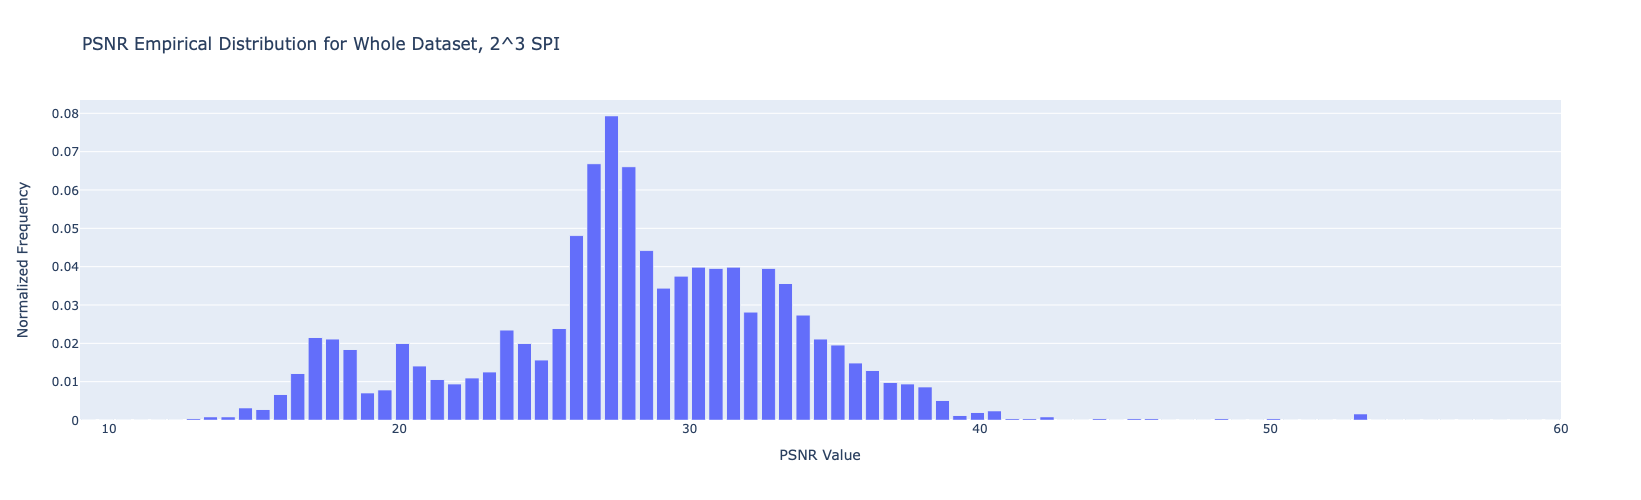

In [35]:
prob_psnr_0008, _, values_psnr_0008, _, x_psnr_0008, f_x_psnr_0008 = probability_values(psnr_0008, 
                                                                                        max_val=60)
fig = go.Figure(go.Bar(y=prob_psnr_0008, x=values_psnr_0008, name='2^3'))
# fig.add_trace(go.Bar(y=prob_psnr, x=values_psnr, name='Full'))
# fig.add_trace(go.Scatter(x=x_psnr, y=f_x_psnr, name='cubic spline fit'))
# fig.add_trace(go.Scatter(x=x_psnr_0008, y=f_x_psnr_0008, name='cubic spline fit 0008'))
fig.update_layout(title='PSNR Empirical Distribution for Whole Dataset, 2^3 SPI',
                  xaxis_title="PSNR Value",
                  yaxis_title="Normalized Frequency",
                  width=800, height=500)
fig.update_xaxes(range = [9,60])
fig.show()

## KL Divergence 0008

In [36]:
JS_ssim_0008 = jensenshannon(prob_ssim, prob_ssim_0008)
JS_psnr_0008 = jensenshannon(prob_psnr, prob_psnr_0008)

print(JS_ssim_0008, JS_psnr_0008)

0.06838932918566819 0.05767170260239481


## Sampling 16 Crop in Each Image

In [37]:
ssim_0016, psnr_0016 = return_arrays(ssim_array, psnr_array, 16)

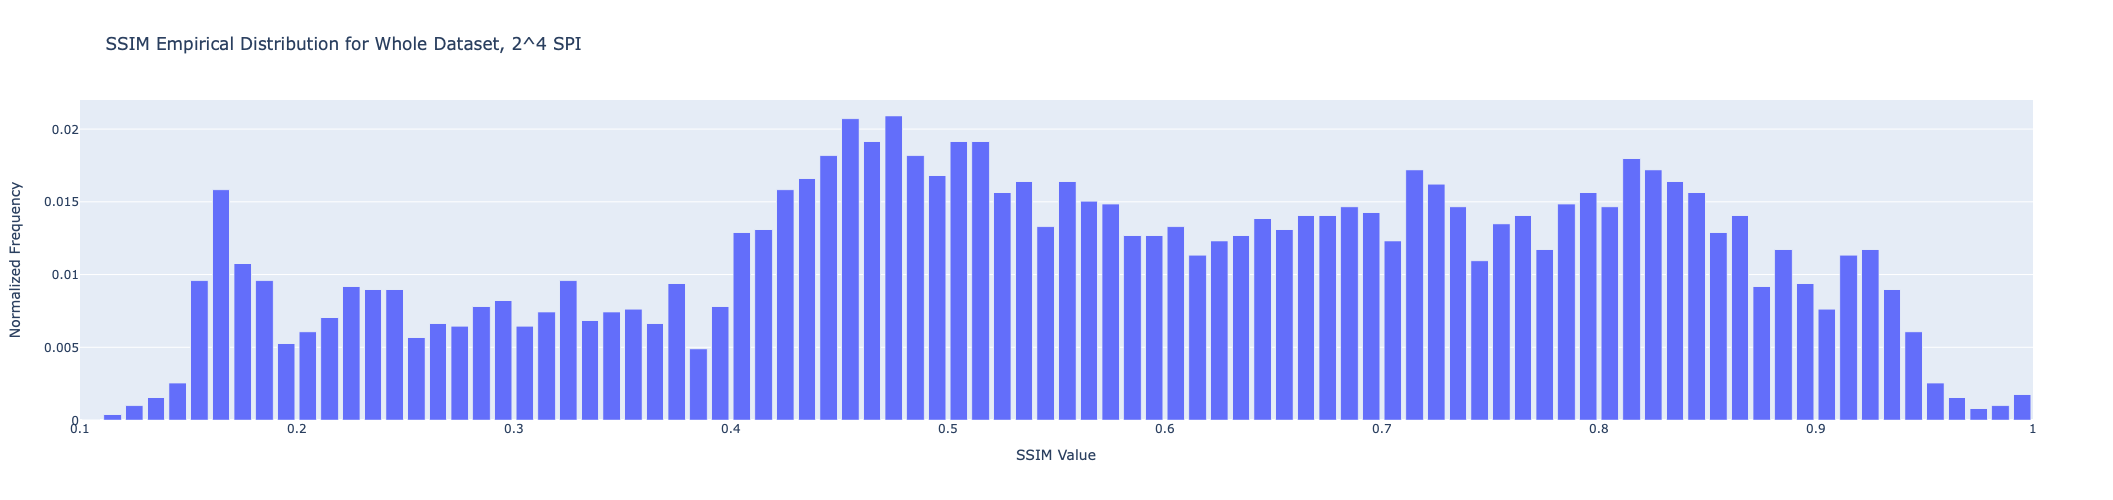

In [38]:
prob_ssim_0016, _, values_ssim_0016, _, x_ssim_0016, f_x_ssim_0016 = probability_values(ssim_0016)

fig = go.Figure(go.Bar(y=prob_ssim_0016, x=values_ssim_0016, name='2^4'))
# fig.add_trace(go.Bar(y=prob_ssim, x=values_ssim, name='Full'))
# fig.add_trace(go.Scatter(x=x_ssim, y=f_x_ssim, name='cubic spline fit'))
# fig.add_trace(go.Scatter(x=x_ssim_0016, y=f_x_ssim_0016, name='cubic spline fit 0016'))
fig.update_layout(title='SSIM Empirical Distribution for Whole Dataset, 2^4 SPI',
                  xaxis_title="SSIM Value",
                  yaxis_title="Normalized Frequency",
                  width=800, height=500)
fig.update_xaxes(range = [0.1,1])
fig.show()

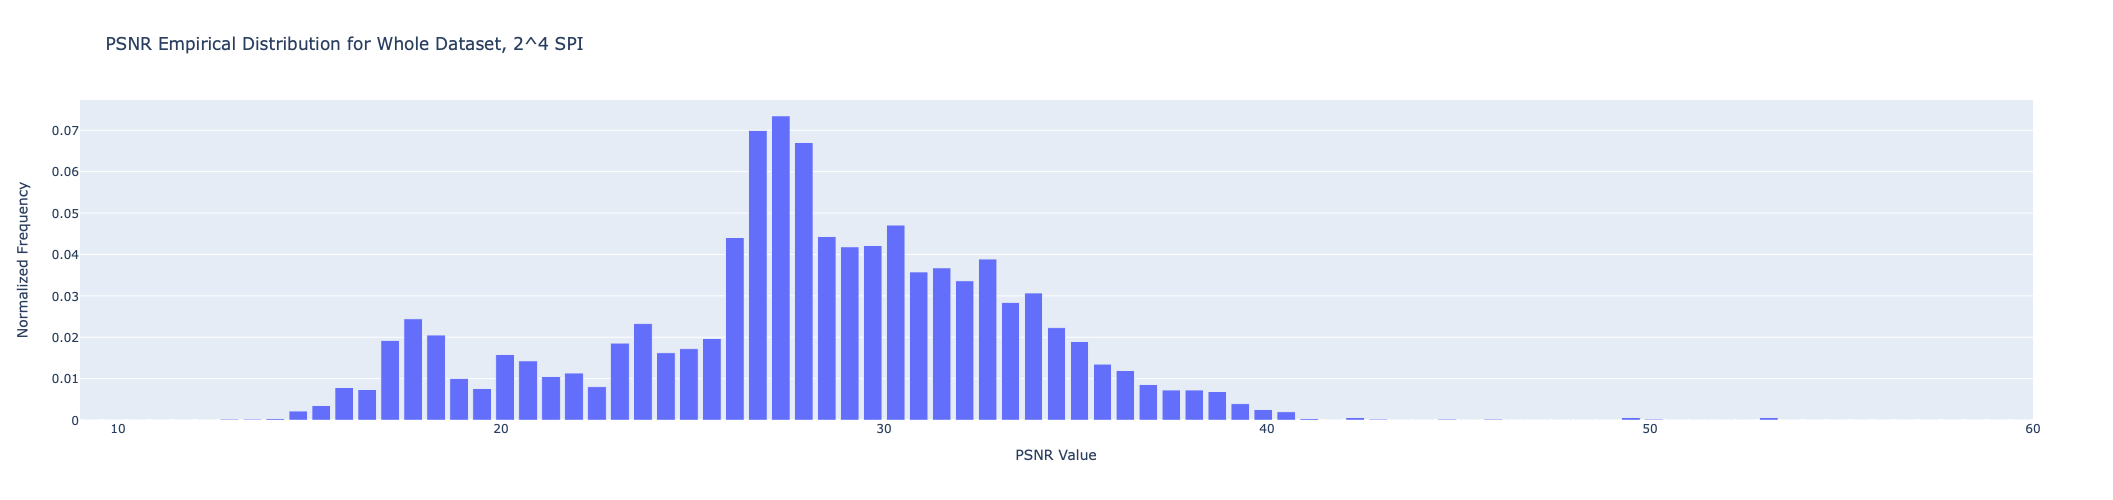

In [39]:
prob_psnr_0016, _, values_psnr_0016, _, x_psnr_0016, f_x_psnr_0016 = probability_values(psnr_0016, 
                                                                                        max_val=60)
fig = go.Figure(go.Bar(y=prob_psnr_0016, x=values_psnr_0016, name=' 2^4'))
# fig.add_trace(go.Bar(y=prob_psnr, x=values_psnr, name='Full'))
# fig.add_trace(go.Scatter(x=x_psnr, y=f_x_psnr, name='cubic spline fit'))
# fig.add_trace(go.Scatter(x=x_psnr_0016, y=f_x_psnr_0016, name='cubic spline fit 0016'))
fig.update_layout(title='PSNR Empirical Distribution for Whole Dataset, 2^4 SPI',
                  xaxis_title="PSNR Value",
                  yaxis_title="Normalized Frequency",
                  width=800, height=500)
fig.update_xaxes(range = [9,60])
fig.show()

## KL Divergence 0016

In [40]:
JS_ssim_0016 = jensenshannon(prob_ssim, prob_ssim_0016)
JS_psnr_0016 = jensenshannon(prob_psnr, prob_psnr_0016)

print(JS_ssim_0016, JS_psnr_0016)

0.04712291254643722 0.04816581621480541


## Sampling 32 Crop in Each Image

In [41]:
ssim_0032, psnr_0032 = return_arrays(ssim_array, psnr_array, 32)

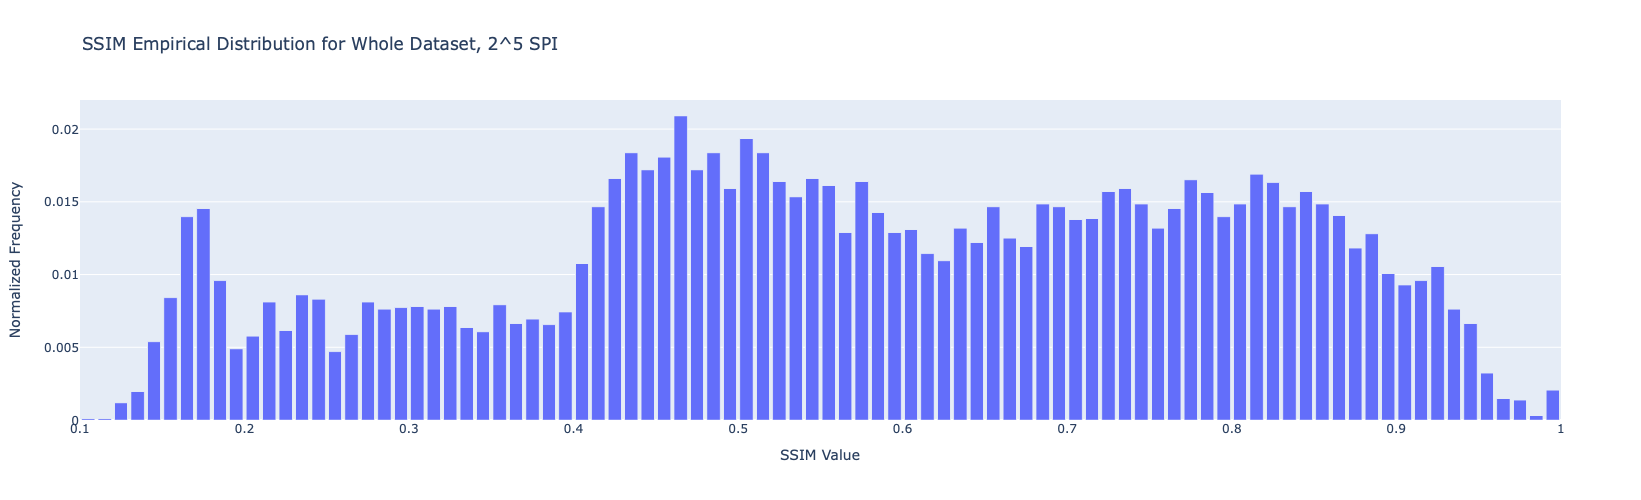

In [42]:
prob_ssim_0032, _, values_ssim_0032, _, x_ssim_0032, f_x_ssim_0032 = probability_values(ssim_0032)

fig = go.Figure(go.Bar(y=prob_ssim_0032, x=values_ssim_0032, name='2^5'))
# fig.add_trace(go.Bar(y=prob_ssim, x=values_ssim, name='Full'))
# fig.add_trace(go.Scatter(x=x_ssim, y=f_x_ssim, name='cubic spline fit'))
# fig.add_trace(go.Scatter(x=x_ssim_0032, y=f_x_ssim_0032, name='cubic spline fit 0032'))
fig.update_layout(title='SSIM Empirical Distribution for Whole Dataset, 2^5 SPI',
                  xaxis_title="SSIM Value",
                  yaxis_title="Normalized Frequency",
                  width=800, height=500)
fig.update_xaxes(range = [0.1,1])
fig.show()

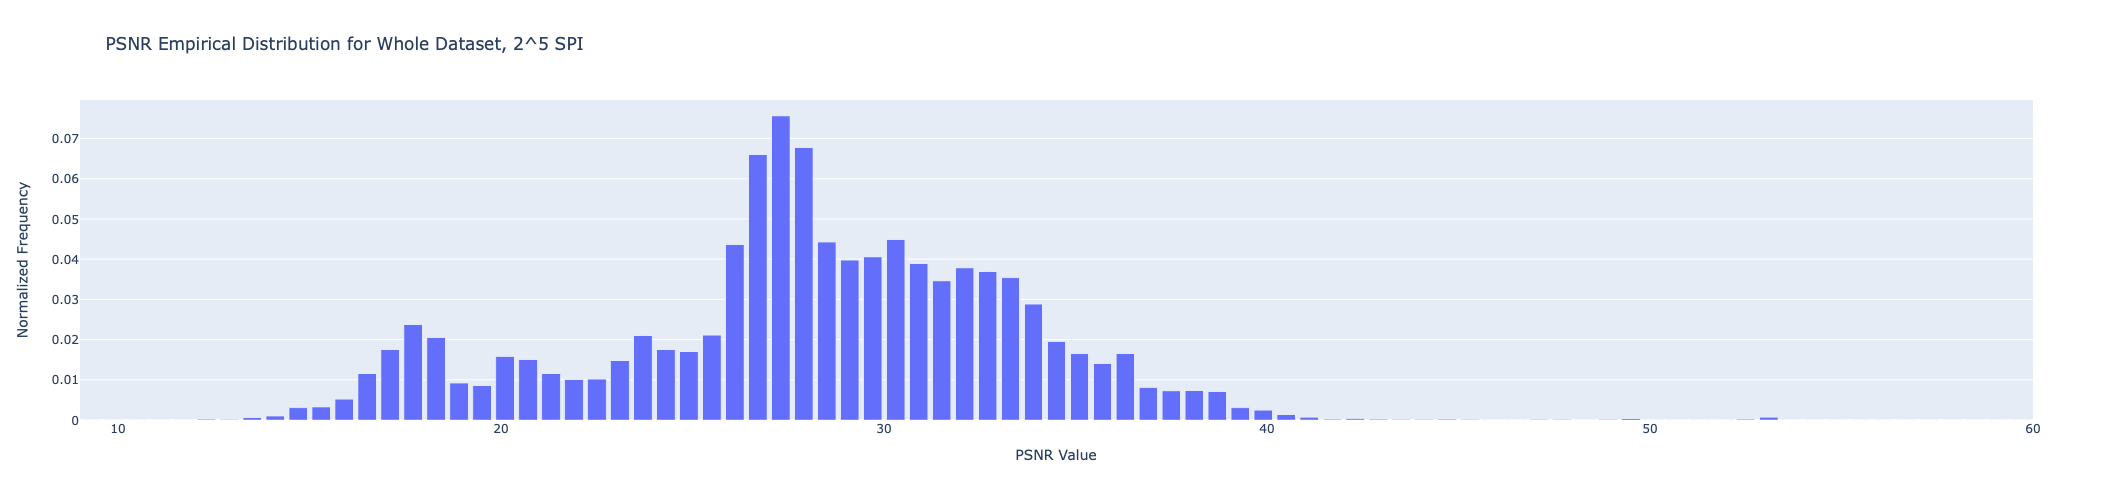

In [43]:
prob_psnr_0032, _, values_psnr_0032, _, x_psnr_0032, f_x_psnr_0032 = probability_values(psnr_0032, 
                                                                                        max_val=60)
fig = go.Figure(go.Bar(y=prob_psnr_0032, x=values_psnr_0032, name='2^5'))
# fig.add_trace(go.Bar(y=prob_psnr, x=values_psnr, name='Full'))
# fig.add_trace(go.Scatter(x=x_psnr, y=f_x_psnr, name='cubic spline fit'))
# fig.add_trace(go.Scatter(x=x_psnr_0032, y=f_x_psnr_0032, name='cubic spline fit 0032'))
fig.update_layout(title='PSNR Empirical Distribution for Whole Dataset, 2^5 SPI',
                  xaxis_title="PSNR Value",
                  yaxis_title="Normalized Frequency",
                  width=800, height=500)
fig.update_xaxes(range = [9,60])
fig.show()

## KL Divergence 0032

In [44]:
JS_ssim_0032 = jensenshannon(prob_ssim, prob_ssim_0032)
JS_psnr_0032 = jensenshannon(prob_psnr, prob_psnr_0032)

print(JS_ssim_0032, JS_psnr_0032)

0.03726691233994812 0.03736702580493551


## Sampling 64 Crop in Each Image

In [45]:
ssim_0064, psnr_0064 = return_arrays(ssim_array, psnr_array, 64)

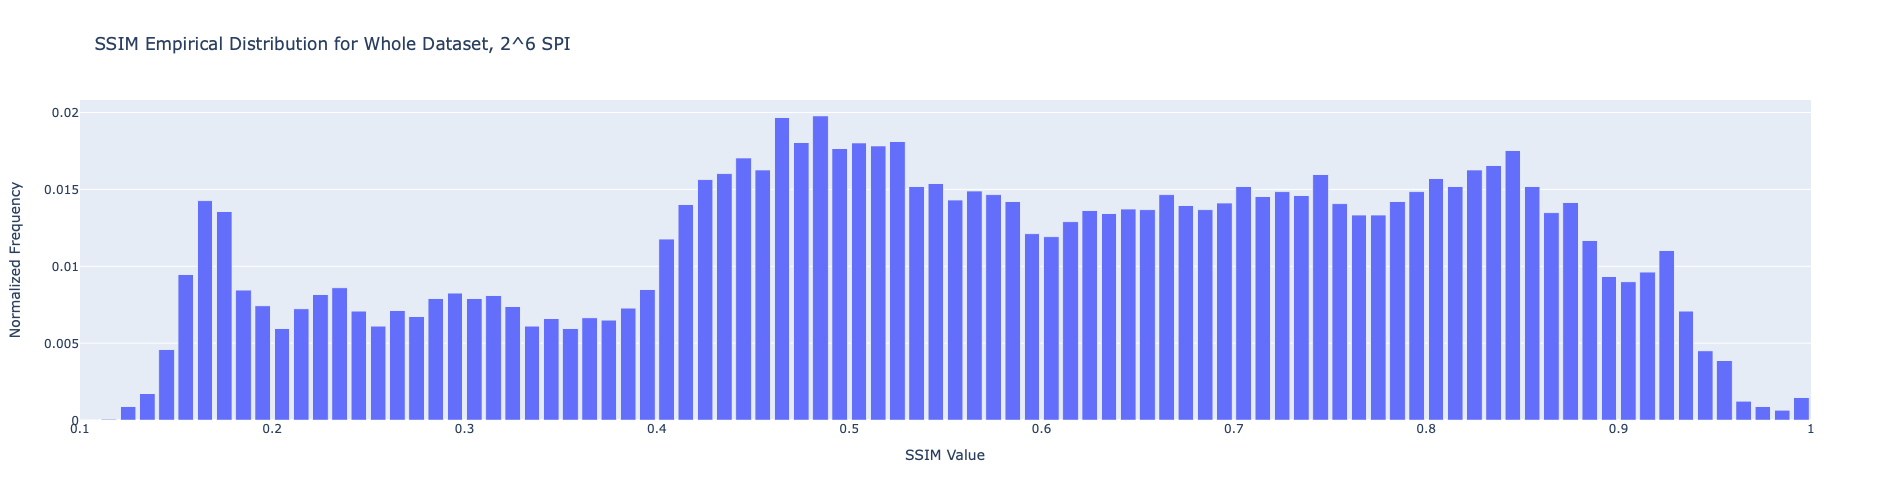

In [46]:
prob_ssim_0064, _, values_ssim_0064, _, x_ssim_0064, f_x_ssim_0064 = probability_values(ssim_0064)

fig = go.Figure(go.Bar(y=prob_ssim_0064, x=values_ssim_0064, name='2^6'))
# fig.add_trace(go.Bar(y=prob_ssim, x=values_ssim, name='Full'))
# fig.add_trace(go.Scatter(x=x_ssim, y=f_x_ssim, name='cubic spline fit'))
# fig.add_trace(go.Scatter(x=x_ssim_0064, y=f_x_ssim_0064, name='cubic spline fit 0064'))
fig.update_layout(title='SSIM Empirical Distribution for Whole Dataset, 2^6 SPI',
                  xaxis_title="SSIM Value",
                  yaxis_title="Normalized Frequency",
                  width=800, height=500)
fig.update_xaxes(range = [0.1,1])
fig.show()

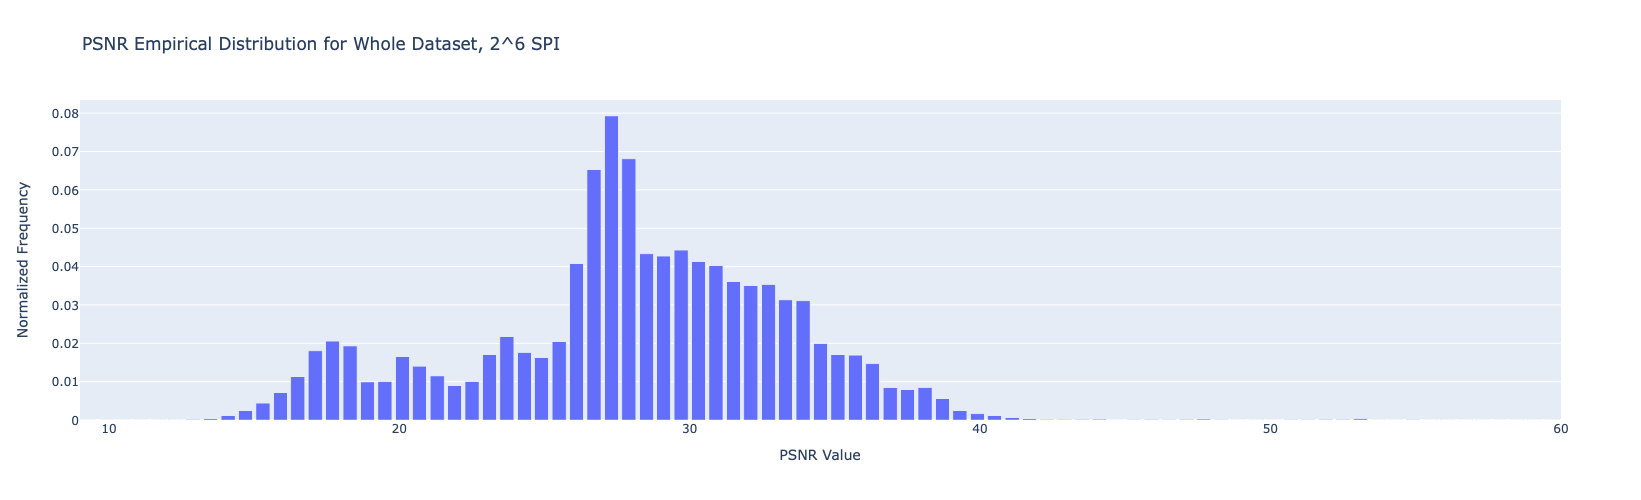

In [47]:
prob_psnr_0064, _, values_psnr_0064, _, x_psnr_0064, f_x_psnr_0064 = probability_values(psnr_0064, 
                                                                                        max_val=60)
fig = go.Figure(go.Bar(y=prob_psnr_0064, x=values_psnr_0064, name='2^6'))
# fig.add_trace(go.Bar(y=prob_psnr, x=values_psnr, name='Full'))
# fig.add_trace(go.Scatter(x=x_psnr, y=f_x_psnr, name='cubic spline fit'))
# fig.add_trace(go.Scatter(x=x_psnr_0064, y=f_x_psnr_0064, name='cubic spline fit 0064'))
fig.update_layout(title='PSNR Empirical Distribution for Whole Dataset, 2^6 SPI',
                  xaxis_title="PSNR Value",
                  yaxis_title="Normalized Frequency",
                  width=800, height=500)
fig.update_xaxes(range = [9,60])
fig.show()

## KL Divergence 0064

In [48]:
JS_ssim_0064 = jensenshannon(prob_ssim, prob_ssim_0064)
JS_psnr_0064 = jensenshannon(prob_psnr, prob_psnr_0064)

print(JS_ssim_0064, JS_psnr_0064)

0.02441788653396664 0.030237314685936174


## Sampling 128 Crop in Each Image

In [49]:
ssim_0128, psnr_0128 = return_arrays(ssim_array, psnr_array, 128)

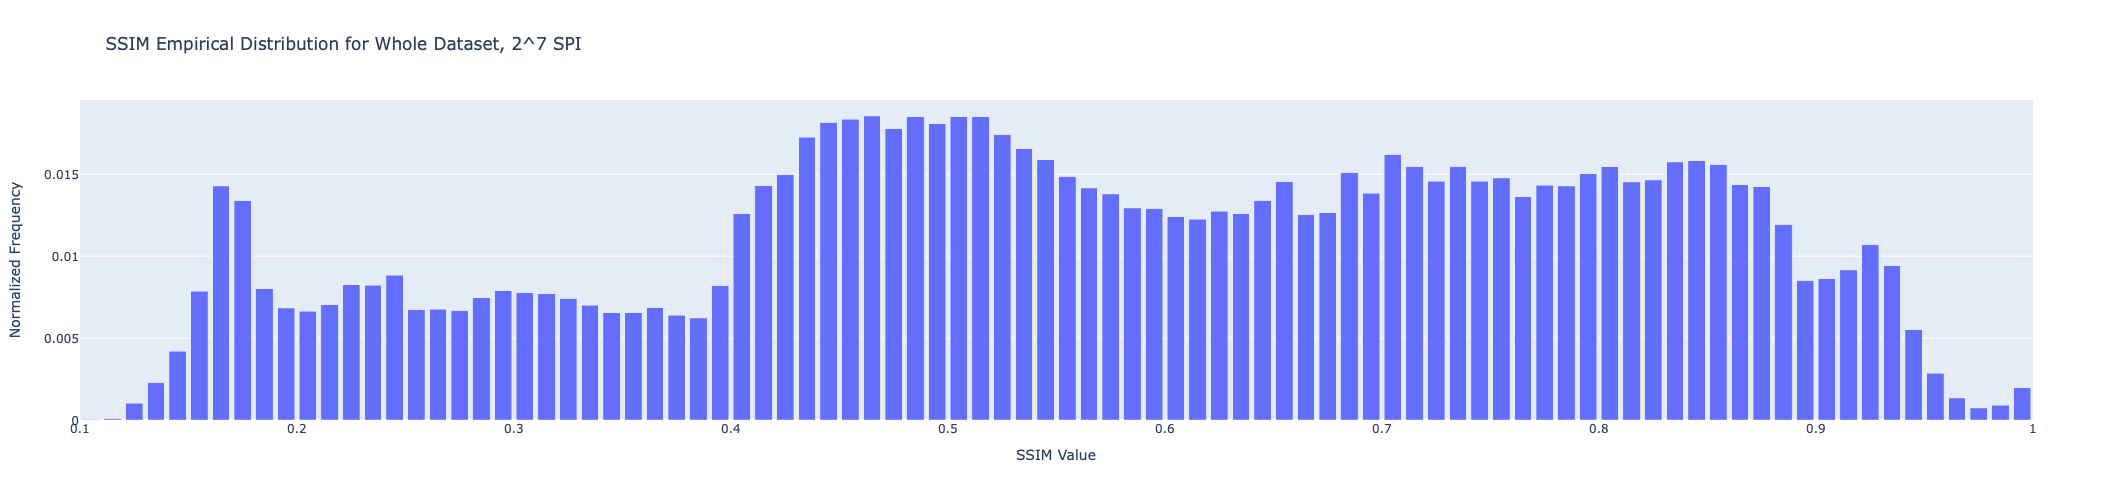

In [50]:
prob_ssim_0128, _, values_ssim_0128, _, x_ssim_0128, f_x_ssim_0128 = probability_values(ssim_0128)

fig = go.Figure(go.Bar(y=prob_ssim_0128, x=values_ssim_0128, name='2^7'))
# fig.add_trace(go.Bar(y=prob_ssim, x=values_ssim, name='Full'))
# fig.add_trace(go.Scatter(x=x_ssim, y=f_x_ssim, name='cubic spline fit'))
# fig.add_trace(go.Scatter(x=x_ssim_0128, y=f_x_ssim_0128, name='cubic spline fit 0128'))
fig.update_layout(title='SSIM Empirical Distribution for Whole Dataset, 2^7 SPI',
                  xaxis_title="SSIM Value",
                  yaxis_title="Normalized Frequency",
                  width=800, height=500)
fig.update_xaxes(range = [0.1,1])
fig.show()

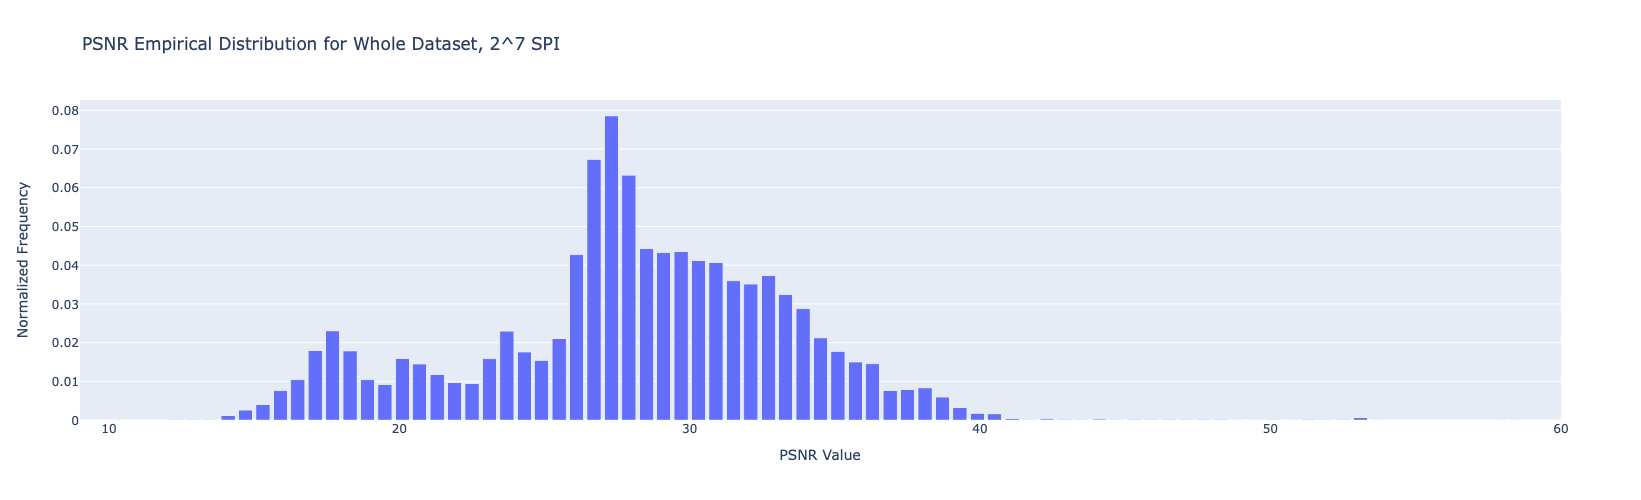

In [51]:
prob_psnr_0128, _, values_psnr_0128, _, x_psnr_0128, f_x_psnr_0128 = probability_values(psnr_0128, 
                                                                                        max_val=60)
fig = go.Figure(go.Bar(y=prob_psnr_0128, x=values_psnr_0128, name='2^7'))
# fig.add_trace(go.Bar(y=prob_psnr, x=values_psnr, name='Full'))
# fig.add_trace(go.Scatter(x=x_psnr, y=f_x_psnr, name='cubic spline fit'))
# fig.add_trace(go.Scatter(x=x_psnr_0128, y=f_x_psnr_0128, name='cubic spline fit 0128'))
fig.update_layout(title='PSNR Empirical Distribution for Whole Dataset, 2^7 SPI',
                  xaxis_title="PSNR Value",
                  yaxis_title="Normalized Frequency",
                  width=800, height=500)
fig.update_xaxes(range = [9,60])
fig.show()

## KL Divergence 0128

In [52]:
JS_ssim_0128 = jensenshannon(prob_ssim, prob_ssim_0128)
JS_psnr_0128 = jensenshannon(prob_psnr, prob_psnr_0128)

print(JS_ssim_0128, JS_psnr_0128)

0.02238135835280768 0.02412065082896241


## Sampling 256 Crop in Each Image

In [53]:
ssim_0256, psnr_0256 = return_arrays(ssim_array, psnr_array, 256)

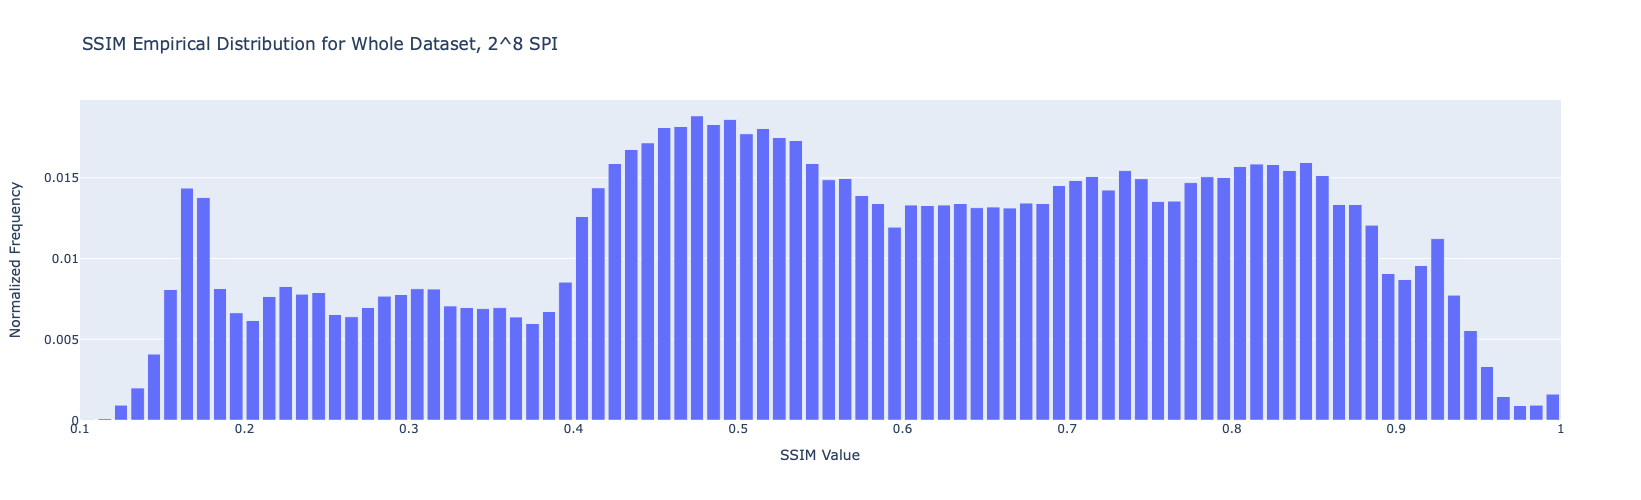

In [54]:
prob_ssim_0256, _, values_ssim_0256, _, x_ssim_0256, f_x_ssim_0256 = probability_values(ssim_0256)

fig = go.Figure(go.Bar(y=prob_ssim_0256, x=values_ssim_0256, name='2^8'))
# fig.add_trace(go.Bar(y=prob_ssim, x=values_ssim, name='Full'))
# fig.add_trace(go.Scatter(x=x_ssim, y=f_x_ssim, name='cubic spline fit'))
# fig.add_trace(go.Scatter(x=x_ssim_0256, y=f_x_ssim_0256, name='cubic spline fit 0256'))
fig.update_layout(title='SSIM Empirical Distribution for Whole Dataset, 2^8 SPI',
                  xaxis_title="SSIM Value",
                  yaxis_title="Normalized Frequency",
                  width=800, height=500)
fig.update_xaxes(range = [0.1,1])
fig.show()

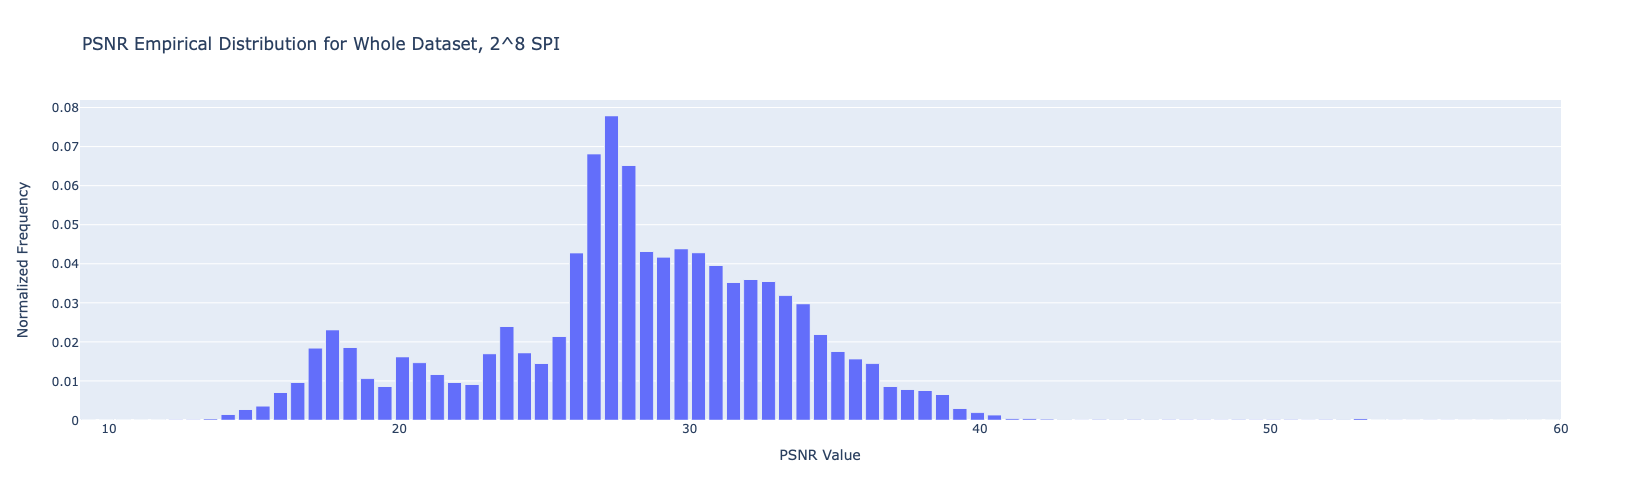

In [55]:
prob_psnr_0256, _, values_psnr_0256, _, x_psnr_0256, f_x_psnr_0256 = probability_values(psnr_0256, 
                                                                                        max_val=60)
fig = go.Figure(go.Bar(y=prob_psnr_0256, x=values_psnr_0256, name='2^8'))
# fig.add_trace(go.Bar(y=prob_psnr, x=values_psnr, name='Full'))
# fig.add_trace(go.Scatter(x=x_psnr, y=f_x_psnr, name='cubic spline fit'))
# fig.add_trace(go.Scatter(x=x_psnr_0256, y=f_x_psnr_0256, name='cubic spline fit 0256'))
fig.update_layout(title='PSNR Empirical Distribution for Whole Dataset, 2^8 SPI',
                  xaxis_title="PSNR Value",
                  yaxis_title="Normalized Frequency",
                  width=800, height=500)
fig.update_xaxes(range = [9,60])
fig.show()

### KL Divergence 0256

In [56]:
JS_ssim_0256 = jensenshannon(prob_ssim, prob_ssim_0256)
JS_psnr_0256 = jensenshannon(prob_psnr, prob_psnr_0256)

print(JS_ssim_0256, JS_psnr_0256)

0.019224890848086124 0.023683021389819776


## Sampling 512 Crop in Each Image

In [57]:
ssim_0512, psnr_0512 = return_arrays(ssim_array, psnr_array, 512)

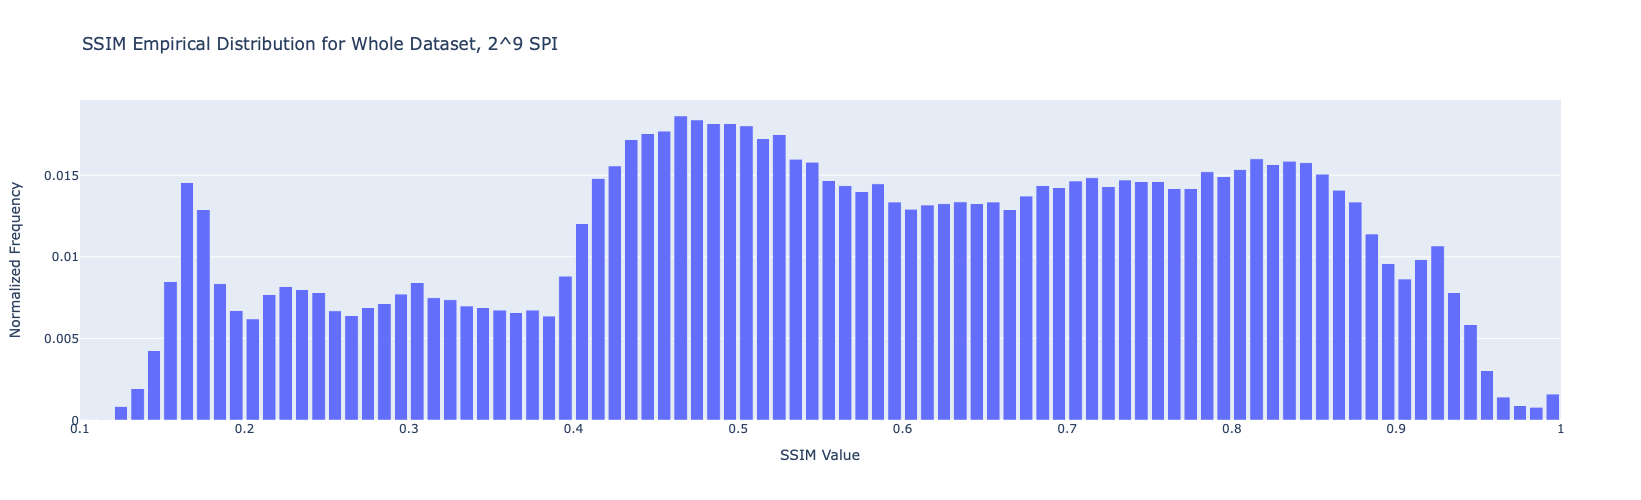

In [58]:
prob_ssim_0512, _, values_ssim_0512, _, x_ssim_0512, f_x_ssim_0512 = probability_values(ssim_0512)

fig = go.Figure(go.Bar(y=prob_ssim_0512, x=values_ssim_0512, name='2^9'))
# fig.add_trace(go.Bar(y=prob_ssim, x=values_ssim, name='Full'))
# fig.add_trace(go.Scatter(x=x_ssim, y=f_x_ssim, name='cubic spline fit'))
# fig.add_trace(go.Scatter(x=x_ssim_0512, y=f_x_ssim_0512, name='cubic spline fit 0512'))
fig.update_layout(title='SSIM Empirical Distribution for Whole Dataset, 2^9 SPI',
                  xaxis_title="SSIM Value",
                  yaxis_title="Normalized Frequency",
                  width=800, height=500)
fig.update_xaxes(range = [0.1,1])
fig.show()

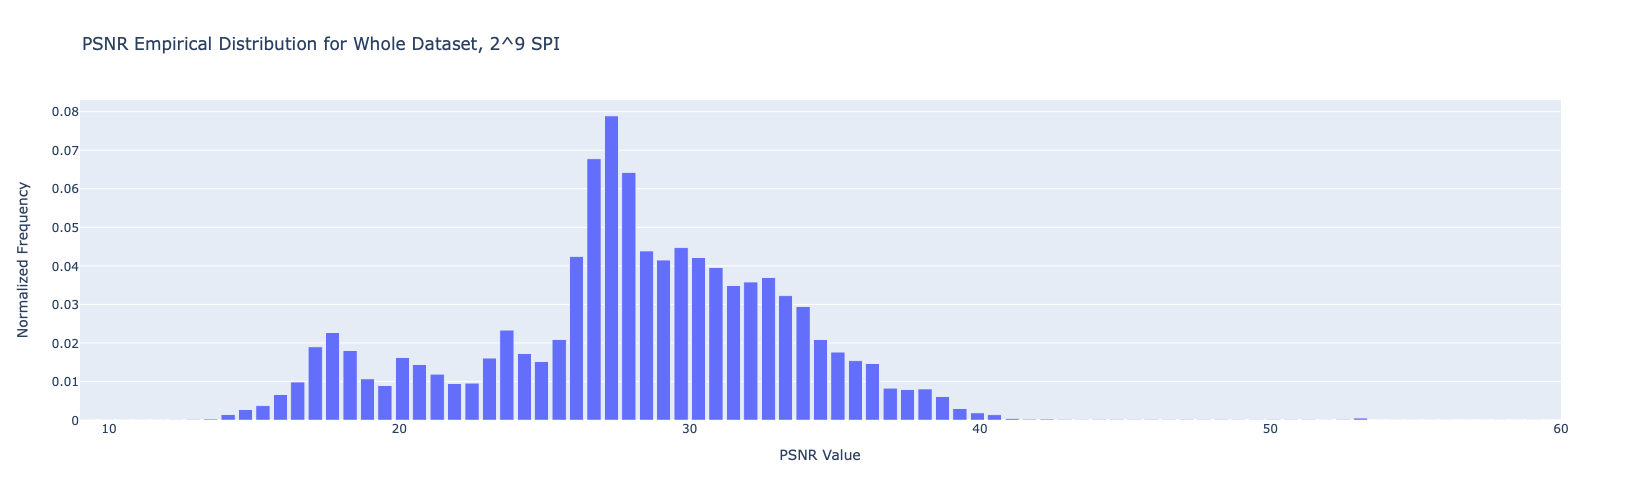

In [59]:
prob_psnr_0512, _, values_psnr_0512, _, x_psnr_0512, f_x_psnr_0512 = probability_values(psnr_0512, 
                                                                                        max_val=60)
fig = go.Figure(go.Bar(y=prob_psnr_0512, x=values_psnr_0512, name='2^9'))
# fig.add_trace(go.Bar(y=prob_psnr, x=values_psnr, name='Full'))
# fig.add_trace(go.Scatter(x=x_psnr, y=f_x_psnr, name='cubic spline fit'))
# fig.add_trace(go.Scatter(x=x_psnr_0512, y=f_x_psnr_0512, name='cubic spline fit 0512'))
fig.update_layout(title='PSNR Empirical Distribution for Whole Dataset, 2^9 SPI',
                  xaxis_title="PSNR Value",
                  yaxis_title="Normalized Frequency",
                  width=800, height=500)
fig.update_xaxes(range = [9,60])
fig.show()

### KL Divergence 0512

In [60]:
JS_ssim_0512 = jensenshannon(prob_ssim, prob_ssim_0512)
JS_psnr_0512 = jensenshannon(prob_psnr, prob_psnr_0512)

print(JS_ssim_0512, JS_psnr_0512)

0.017435714682527872 0.02167682361643459


## Sampling 1024 Crop in Each Image

In [61]:
ssim_1024, psnr_1024 = return_arrays(ssim_array, psnr_array, 1024)

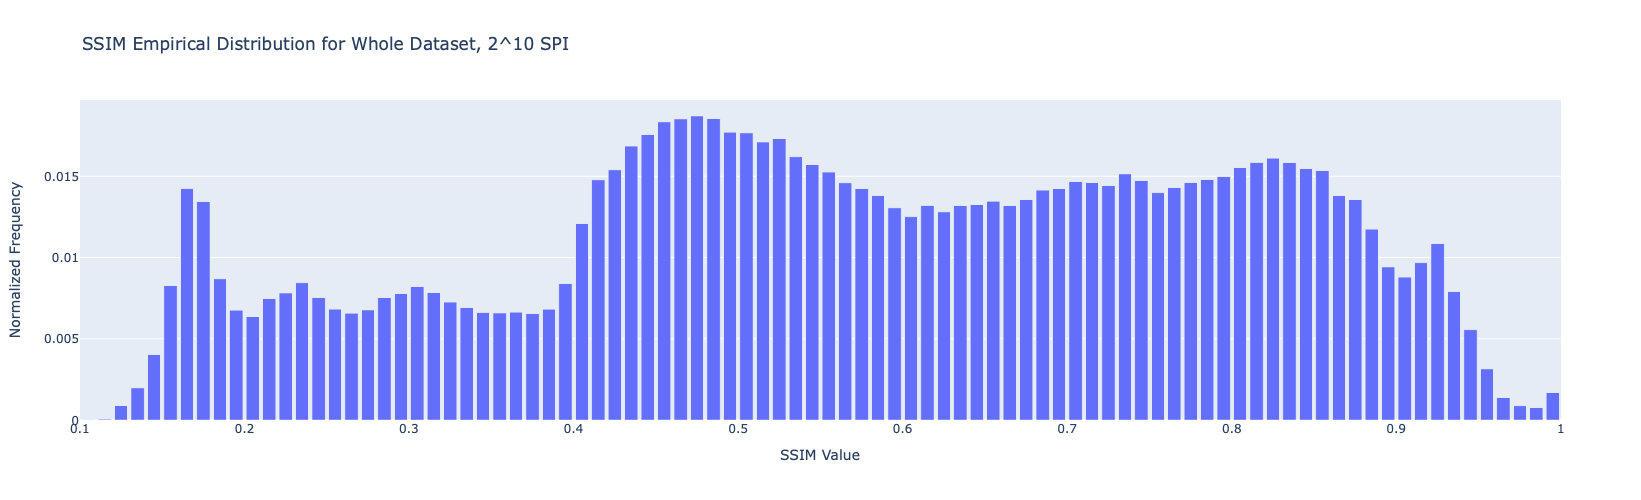

In [62]:
prob_ssim_1024, _, values_ssim_1024, _, x_ssim_1024, f_x_ssim_1024 = probability_values(ssim_1024)

fig = go.Figure(go.Bar(y=prob_ssim_1024, x=values_ssim_1024, name='2^10'))
# fig.add_trace(go.Bar(y=prob_ssim, x=values_ssim, name='Full'))
# fig.add_trace(go.Scatter(x=x_ssim, y=f_x_ssim, name='cubic spline fit'))
# fig.add_trace(go.Scatter(x=x_ssim_1024, y=f_x_ssim_1024, name='cubic spline fit 1024'))
fig.update_layout(title='SSIM Empirical Distribution for Whole Dataset, 2^10 SPI',
                  xaxis_title="SSIM Value",
                  yaxis_title="Normalized Frequency",
                  width=800, height=500)
fig.update_xaxes(range = [0.1,1])
fig.show()

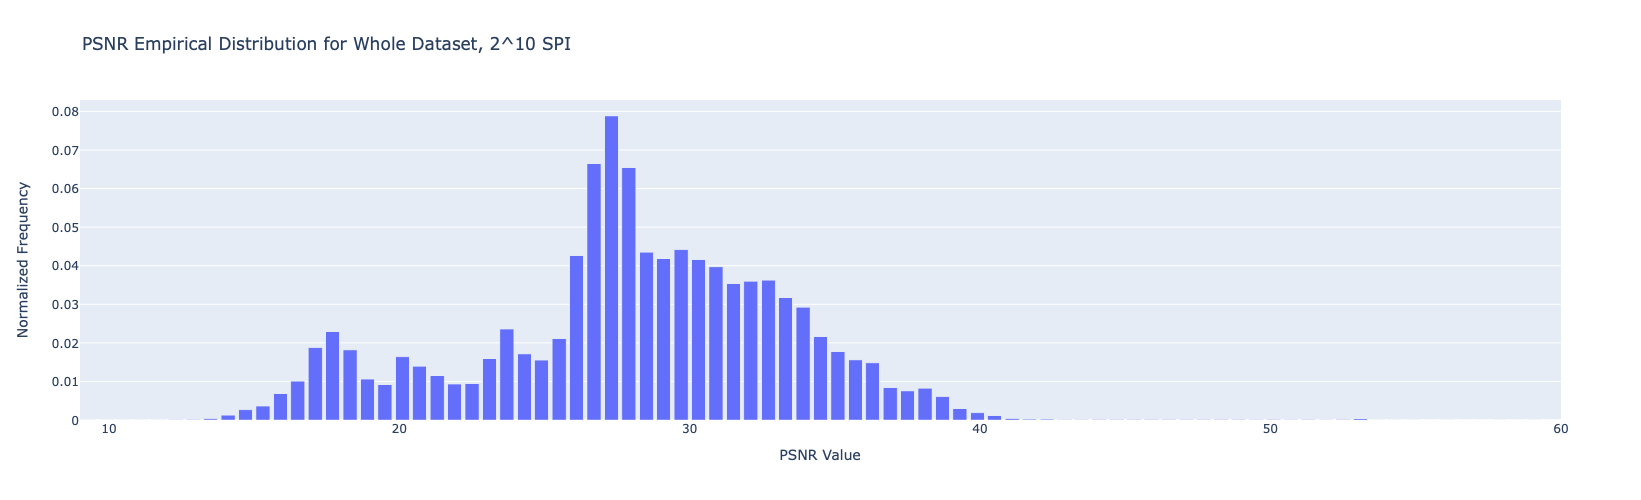

In [63]:
prob_psnr_1024, _, values_psnr_1024, _, x_psnr_1024, f_x_psnr_1024 = probability_values(psnr_1024, 
                                                                                        max_val=60)
fig = go.Figure(go.Bar(y=prob_psnr_1024, x=values_psnr_1024, name='2^10'))
# fig.add_trace(go.Bar(y=prob_psnr, x=values_psnr, name='Full'))
# fig.add_trace(go.Scatter(x=x_psnr, y=f_x_psnr, name='cubic spline fit'))
# fig.add_trace(go.Scatter(x=x_psnr_1024, y=f_x_psnr_1024, name='cubic spline fit 1024'))
fig.update_layout(title='PSNR Empirical Distribution for Whole Dataset, 2^10 SPI',
                  xaxis_title="PSNR Value",
                  yaxis_title="Normalized Frequency",
                  width=800, height=500)
fig.update_xaxes(range = [9,60])
fig.show()

### KL Divergence 1024

In [64]:
JS_ssim_1024 = jensenshannon(prob_ssim, prob_ssim_1024)
JS_psnr_1024 = jensenshannon(prob_psnr, prob_psnr_1024)

print(JS_ssim_1024, JS_psnr_1024)

0.015718247760857226 0.02075383182305771


## Sampling 2048 Crop in Each Image

In [65]:
ssim_2048, psnr_2048 = return_arrays(ssim_array, psnr_array, 2048)

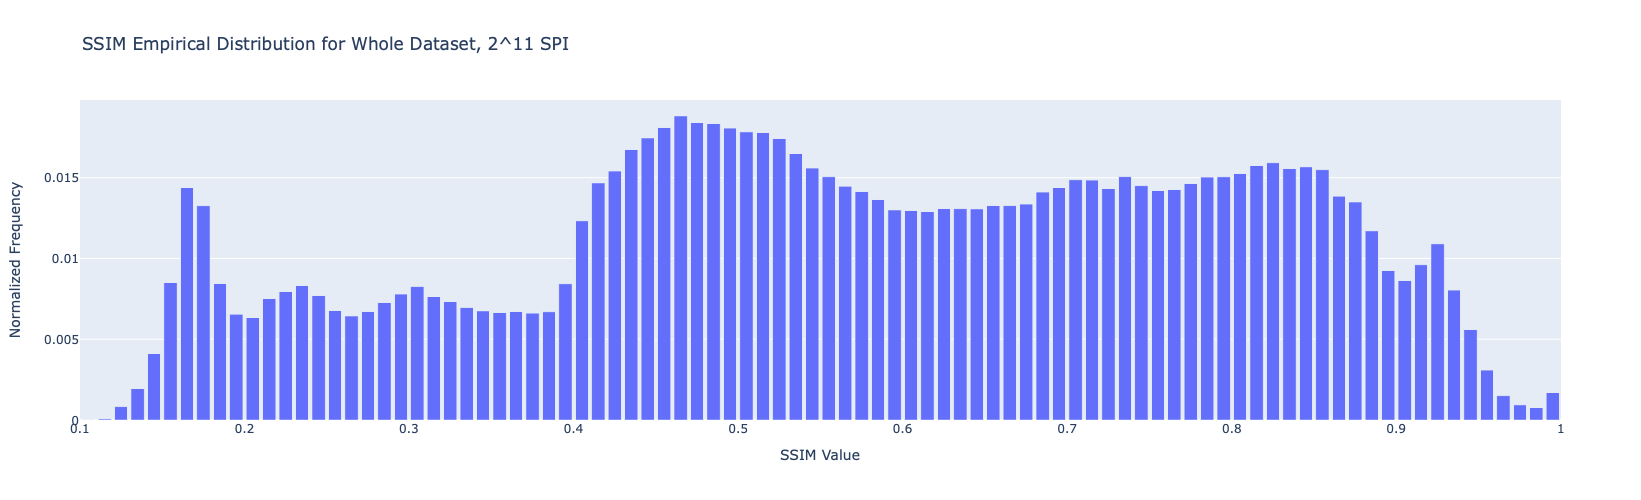

In [66]:
prob_ssim_2048, _, values_ssim_2048, _, x_ssim_2048, f_x_ssim_2048 = probability_values(ssim_2048)

fig = go.Figure(go.Bar(y=prob_ssim_2048, x=values_ssim_2048, name='2^11'))
# fig.add_trace(go.Bar(y=prob_ssim, x=values_ssim, name='Full'))
# fig.add_trace(go.Scatter(x=x_ssim, y=f_x_ssim, name='cubic spline fit'))
# fig.add_trace(go.Scatter(x=x_ssim_2048, y=f_x_ssim_2048, name='cubic spline fit 2048'))
fig.update_layout(title='SSIM Empirical Distribution for Whole Dataset, 2^11 SPI',
                  xaxis_title="SSIM Value",
                  yaxis_title="Normalized Frequency",
                  width=800, height=500)
fig.update_xaxes(range = [0.1,1])
fig.show()

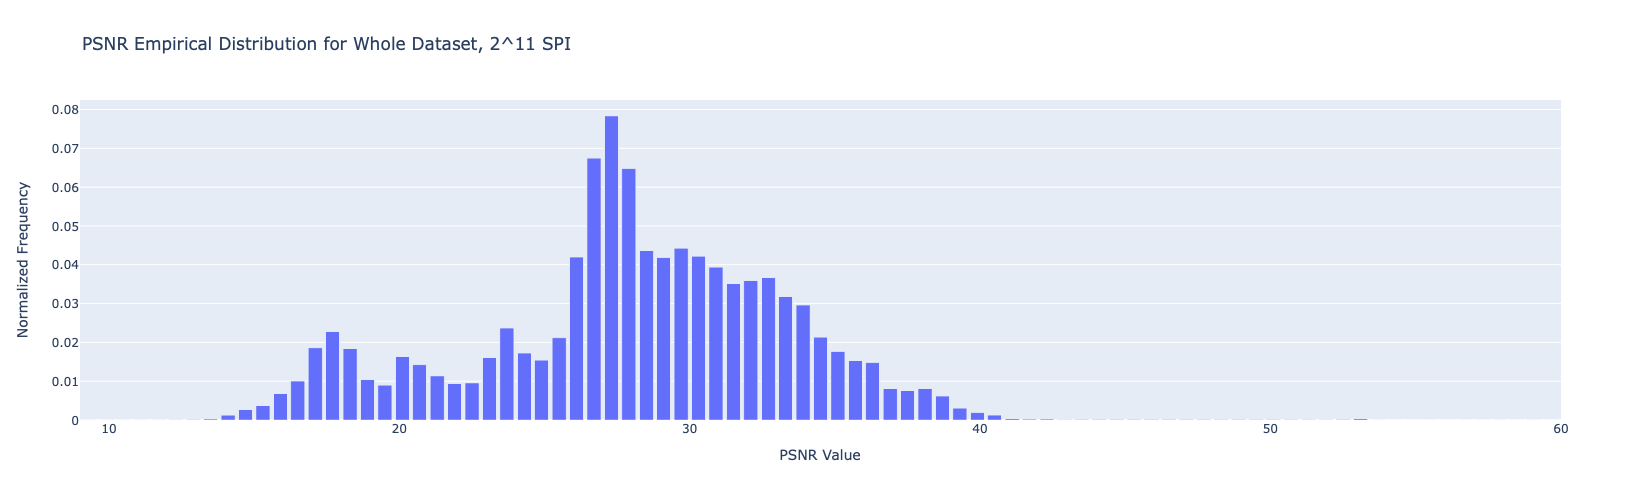

In [67]:
prob_psnr_2048, _, values_psnr_2048, _, x_psnr_2048, f_x_psnr_2048 = probability_values(psnr_2048, 
                                                                                        max_val=60)
fig = go.Figure(go.Bar(y=prob_psnr_2048, x=values_psnr_2048, name='2^11'))
# fig.add_trace(go.Bar(y=prob_psnr, x=values_psnr, name='Full'))
# fig.add_trace(go.Scatter(x=x_psnr, y=f_x_psnr, name='cubic spline fit'))
# fig.add_trace(go.Scatter(x=x_psnr_2048, y=f_x_psnr_2048, name='cubic spline fit 2048'))
fig.update_layout(title='PSNR Empirical Distribution for Whole Dataset, 2^11 SPI',
                  xaxis_title="PSNR Value",
                  yaxis_title="Normalized Frequency",
                  width=800, height=500)
fig.update_xaxes(range = [9,60])
fig.show()

### KL Divergence 2048

In [68]:
JS_ssim_2048 = jensenshannon(prob_ssim, prob_ssim_2048)
JS_psnr_2048 = jensenshannon(prob_psnr, prob_psnr_2048)

print(JS_ssim_2048, JS_psnr_2048)

0.015806745544036514 0.02032927476377289


In [69]:
JS_ssim = [JS_ssim_0001, JS_ssim_0002, JS_ssim_0004, JS_ssim_0008, JS_ssim_0016, JS_ssim_0032, 
           JS_ssim_0064, JS_ssim_0128, JS_ssim_0256, JS_ssim_0512, JS_ssim_1024, JS_ssim_2048]

JS_psnr = [JS_psnr_0001, JS_psnr_0002, JS_psnr_0004, JS_psnr_0008, JS_psnr_0016, JS_psnr_0032, 
           JS_psnr_0064, JS_psnr_0128, JS_psnr_0256, JS_psnr_0512, JS_psnr_1024, JS_psnr_2048]

x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

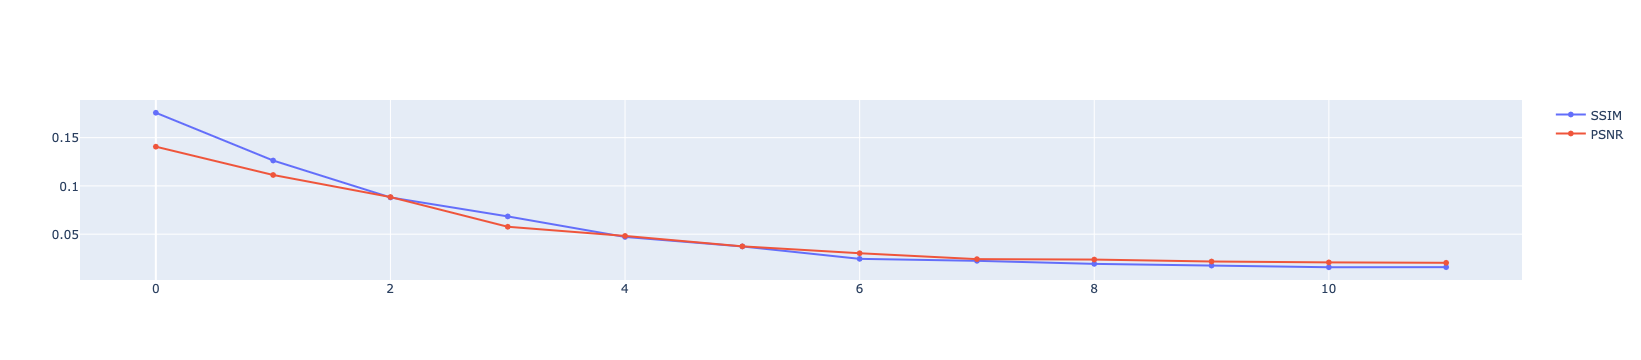

In [70]:
fig = go.Figure(go.Scatter(x=x, y=JS_ssim, name='SSIM'))
fig.add_trace(go.Scatter(x=x, y=JS_psnr, name='PSNR'))
fig.show()